# BoxOffice 2018
## Data Pre-Processing

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import re
import random
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline 

In [2]:
dft = pd.read_csv("./train.csv",encoding="utf8")

dftest = pd.read_csv("./test.csv",encoding="utf8")
print(dft.info())
print()
print(dftest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

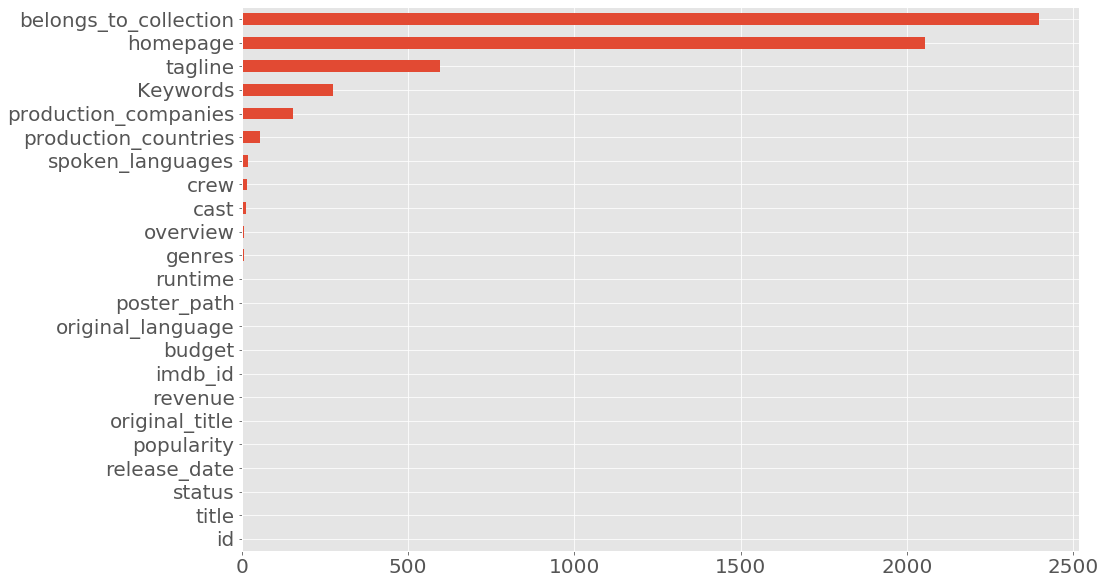

In [3]:
fig = plt.figure(figsize=(15, 10))
dft.isna().sum().sort_values(ascending=True).plot(kind='barh',color='C0', fontsize=20)

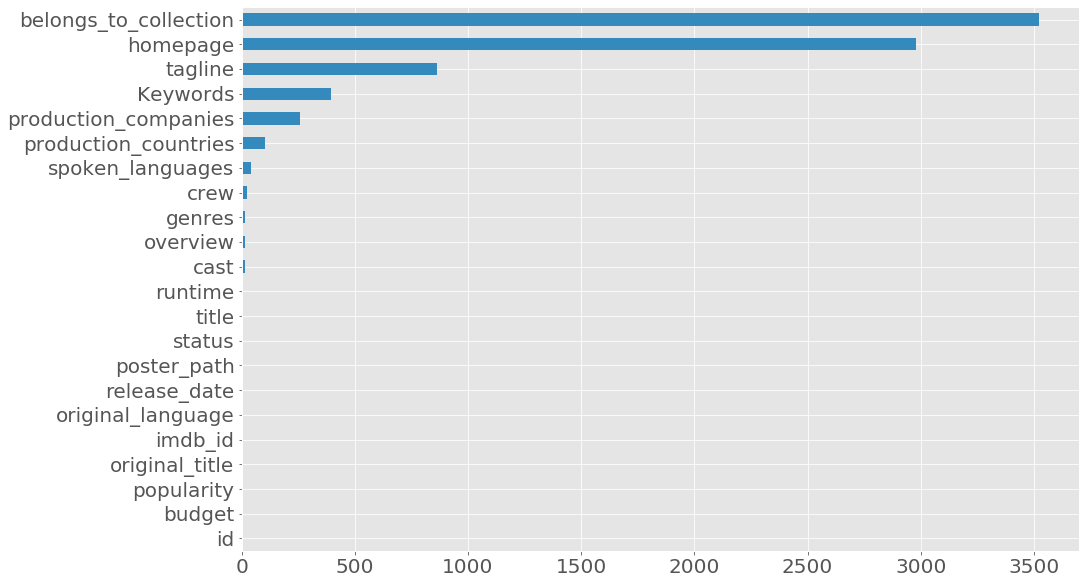

In [4]:
fig = plt.figure(figsize=(15, 10))
dftest.isna().sum().sort_values(ascending=True).plot(kind='barh',color='C1', fontsize=20)

Text(0.5, 0, 'Popularity of the Movie')

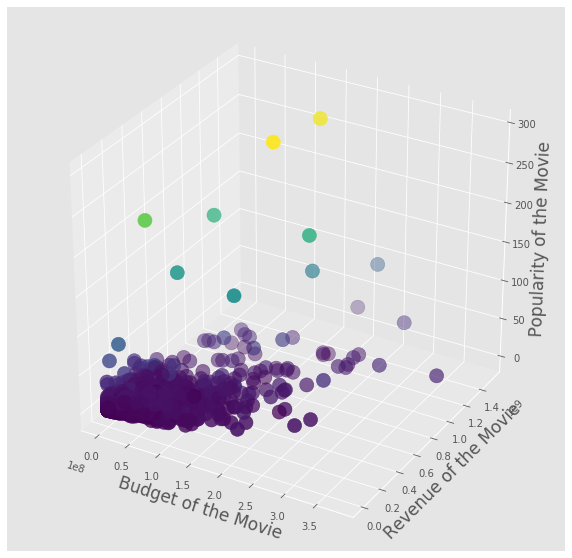

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111,projection = '3d')

# Data for three-dimensional scattered points
zdata =dft.popularity
xdata =dft.budget
ydata = dft.revenue
ax.scatter3D(xdata, ydata, zdata, c=zdata, s = 200)
ax.set_xlabel('Budget of the Movie',fontsize=17)
ax.set_ylabel('Revenue of the Movie',fontsize=17)
ax.set_zlabel('Popularity of the Movie',fontsize=17)

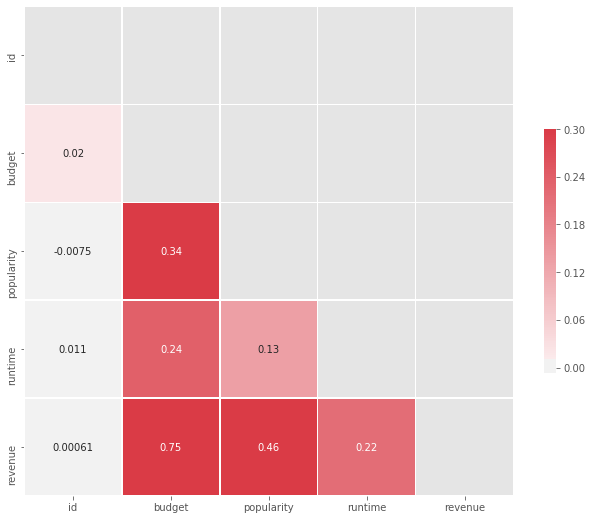

In [6]:
# Creating correlation matrix 

corr = dft.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
import ast

features_list = ['belongs_to_collection', 'genres', 'production_companies',
                 'spoken_languages', 'Keywords', 'cast', 'crew']
dft[features_list] = dft[features_list].fillna('NA').copy()
dftest[features_list] = dftest[features_list].fillna('NA').copy()

def strToList(x):
    m = re.findall(r'\{.*\}',x)
    l = list()
    if m:
        l = list()
        for i in m:
            tmp = ast.literal_eval(i)
            if type(tmp) is tuple:
                l = list(tmp)
            else:
                l.append(tmp)
    return l 
    
for i in features_list:
    dft[i]=dft[i].apply(lambda x:strToList(x))
    
for i in features_list:
    dftest[i]=dftest[i].apply(lambda x:strToList(x))

In [8]:
dft.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [9]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    3000 non-null object
budget                   3000 non-null int64
genres                   3000 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     3000 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         3000 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords            

In [10]:
quanti = ['runtime','budget','popularity','revenue']
dft[quanti].describe()

,runtime,budget,popularity,revenue
count,2998.000000,3.000000e+03,3000.000000,3.000000e+03
mean,107.856571,2.253133e+07,8.463274,6.672585e+07
std,22.086434,3.702609e+07,12.104000,1.375323e+08
min,0.000000,0.000000e+00,0.000001,1.000000e+00
25%,94.000000,0.000000e+00,4.018053,2.379808e+06
50%,104.000000,8.000000e+06,7.374861,1.680707e+07
75%,118.000000,2.900000e+07,10.890983,6.891920e+07
max,338.000000,3.800000e+08,294.337037,1.519558e+09


In [11]:
dft['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

## Features analysis
### Films Genres Feature

In [12]:
d_count = dict()

##My function
def aux(d_count, l):
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if d['name'] in d_count.keys():
                        d_count[d['name']] += 1
                    else:
                        d_count[d['name']] =1
            else:
                d = i
                if d['name'] in d_count.keys():
                    d_count[d['name']] += 1
                else:
                    d_count[d['name']] =1
        


dft['genres'].apply(lambda x: aux(d_count,x))
    
genres = pd.DataFrame.from_dict({'Genres': list(d_count.keys()), 'Nb Films':list(d_count.values())})
genres = genres[['Genres','Nb Films']].copy()
top_genres = genres.nlargest(5, 'Nb Films')

#### Other Method to count : More Pythonic Way

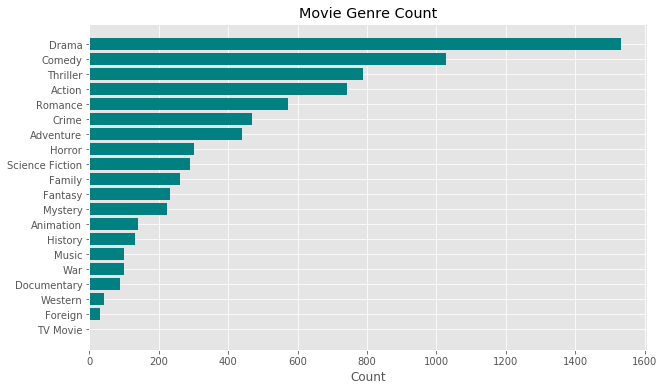

In [13]:
from collections import Counter
##Optimized solution with Counter data structure subclass of Dictionnary
##need to import Counter from module collections

list_of_genres = list(dft['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_genres=Counter([i for j in list_of_genres for i in j]).most_common() #type list 
fig = plt.figure(figsize=(10, 6))
data=dict(most_common_genres)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='teal')
plt.xlabel('Count')
plt.title('Movie Genre Count')
plt.show()

<Figure size 1080x720 with 0 Axes>

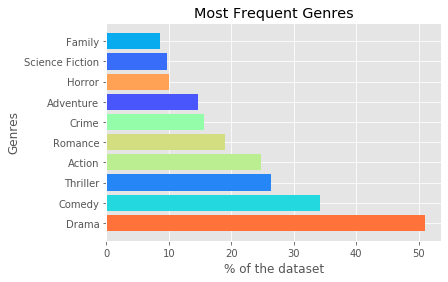

In [14]:
 def plot_graph(n_top,df,nbrow):
    top_df = df.nlargest(n_top, 'Nb Films')
    col = top_df.columns.tolist()
    
    def gen_list_random_colors(x):
        l = list()
        for i in range(x):
            a = random.uniform(0,1)
            if a in l:
                a = random.uniform(0,1)
            else:
                l.append(a)
        return l
    
    c =list(cm.rainbow(gen_list_random_colors(n_top)))
    fig = plt.figure(figsize=(15, 10))
    fig, ax = plt.subplots()
    ax.barh(top_df[col[0]],(top_df[col[1]]/nbrow)*100,color=c)
    ax.set_title('Most Frequent '+col[0])
    plt.ylabel(col[0])
    plt.xlabel("% of the dataset")
    plt.show()
    
plot_graph(10,genres,dft.shape[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/djebali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


There are 48476 words in the combination of all review.


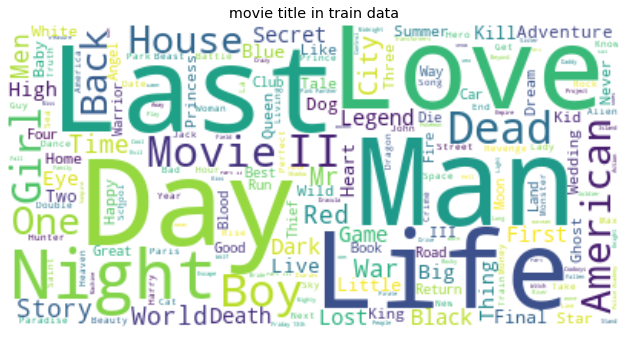

In [15]:
# Movie title text analysis 
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text = " ".join(review for review in dft.title)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

fig = plt.figure(figsize=(11, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('movie title in train data')
plt.axis("off")
plt.show()

#### Creation of variables type of films which is a list with the different types of the films

In [16]:
def aux2(l):
    return [i['name'] for i in l]

dft['genre_list'] = dft['genres'].apply(lambda x: aux2(x))
dftest['genre_list'] = dftest['genres'].apply(lambda x: aux2(x))
dft['genre_list'].head()

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genre_list, dtype: object

In [17]:
import plotly.offline as plty
  
import plotly.graph_objs as go

plty.init_notebook_mode(connected=True)


# data = [go.Histogram(x=x)]
# py.iplot(data, filename='basic histogram')

def df_index(col_name,value,df):
    l = list()
    for i in df.index.tolist():
        if value in df[col_name][i]:
            l.append(i)
    return l

dict_gender =dict()
for feature in quanti:
    val=[]
    for i in names:
        if feature=='runtime':
            val.append(dft[feature].loc[df_index('genre_list',i,dft)].mean()/60)
        else:
            val.append(dft[feature].loc[df_index('genre_list',i,dft)].mean())  
    dict_gender[feature] = val
    

data=[]
layout = go.Layout(title=go.layout.Title(text='Mean of Revenue and Budget Group by Type of Film',xref='paper'))
for i in ['budget','revenue']:
        data.append(go.Bar(x=names,y=dict_gender[i],orientation='v',text='Mean {}'.format(i),name='Mean {}'.format(i)))


figure = go.Figure(data=data,layout=layout)
plty.iplot(figure, filename='basic histogram')

data=[]
layout = go.Layout(title=go.layout.Title(text='Mean of Popularity and Runtime Group by Type of Film',xref='paper'))
for i in ['runtime','popularity']:
        data.append(go.Bar(x=names,y=dict_gender[i],orientation='v',text='Mean {}'.format(i),name='Mean {}'.format(i)))


figure = go.Figure(data=data,layout=layout)
plty.iplot(figure, filename='basic histogram')

In [18]:
def indic_var(x,c):
    if c in x:
        return 1
    else:
        return 0

df_genres = pd.DataFrame()
df_genres[['revenue','budget','popularity']] = dft[['revenue','budget','popularity']].copy()   

for i in names:
    df_genres[i] = dft['genre_list'].apply(lambda x: indic_var(x,i))

genres_mean = dict()

for i in names:
    genres_mean[i] = df_genres[df_genres[i]==1]['revenue'].mean()

df_genres = pd.DataFrame({'Genres':list(genres_mean.keys()),'Mean':list(genres_mean.values())})
df_genres.sort_values(by=['Mean'],ascending=False,inplace=True)

top_genres = list(df_genres.Genres[:6].values)

top_genres


['Adventure', 'Fantasy', 'Animation', 'Family', 'Science Fiction', 'Action']

In [19]:
for i in top_genres:
    dft['gen_'+i] = dft['genre_list'].apply(lambda x: indic_var(x,i))
    dftest['gen_'+i] = dftest['genre_list'].apply(lambda x: indic_var(x,i))
    
dft.drop(['genres'],axis=1,inplace=True)
dftest.drop(['genres'],axis=1,inplace=True)

In [20]:
dft['genres_count'] = dft['genre_list'].apply(len)
dftest['genres_count'] = dftest['genre_list'].apply(len)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
id                       3000 non-null int64
belongs_to_collection    3000 non-null object
budget                   3000 non-null int64
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     3000 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         3000 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 3000 non-null object
cast                

### Production_companies Feature

In [21]:
dft['prod_list'] = dft['production_companies'].apply(lambda x: aux2(x))
dftest['prod_list'] = dftest['production_companies'].apply(lambda x: aux2(x))

##Optimized solution with Counter data structure subclass of Dictionnary
##need to import Counter from module collections
from collections import Counter
prod_tmp = list(dft['production_companies'].apply(lambda x: [i['name'] for i in x] if len(x)>0 else []).values)
prod_dict = Counter([j for i in prod_tmp for j in i])
prod_top20 = dict(prod_dict.most_common(20))


dict_prod =dict()
# for feature in quanti:
#     val=[]
#     for i in list(prod_top20.keys()):
#         if feature=='runtime':
#             val.append(dft[feature].loc[df_index('prod_comp',i,dft)].mean()/60)
#         else:
#             val.append(dft[feature].loc[df_index('prod_comp',i,dft)].mean())  
#     dict_prod[feature] = val


feature ='revenue'
label = []
val = []
for i in list(prod_top20.keys()):
    if feature=='runtime':
        val.append(dft[feature].loc[df_index('prod_list',i,dft)].mean()/60)
        label.append(i)
    else:
        val.append(dft[feature].loc[df_index('prod_list',i,dft)].mean())
        label.append(i)


        
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sprint import sprint

output_notebook()

group = pd.DataFrame.from_dict({"Prod_company":label, "Nb_films":list(prod_top20.values()), "Mean":val})
source = ColumnDataSource(group)
TOOLTIPS = """
     <p align="left"><em>Production Compagny</em> : 
     <font color=#33cc33><strong>@Prod_company</strong></font></br>
     <em>Nb of Films</em>: 
     <font color=#6600cc><strong>@Nb_films</strong></font></br>
     <em>Mean Revenue Per Film</em> : 
     <font color=#ff9900><strong>@Mean{0,0.00} $</strong></font></p>
"""


p = figure(y_range=label,plot_width=600, plot_height=400,tooltips=TOOLTIPS,
           title="Mean Revenue Per Production Company")
p.hbar(y="Prod_company", right='Mean', height=0.4, source=source)


p.xaxis.axis_label = "Mean Revenue"

show(p)


Loading BokehJS ...

In [22]:
from bokeh.models import HoverTool
from bokeh.layouts import row

dict_prod = dict()

for feature in quanti:
    val=[]
    for i in list(prod_top20.keys()):
        if feature=='runtime':
            val.append(dft[feature].loc[df_index('prod_list',i,dft)].mean()/60)
        elif feature=='popularity':
             val.append(dft[feature].loc[df_index('prod_list',i,dft)].mean())
        else:
            val.append(dft[feature].loc[df_index('prod_list',i,dft)].mean())  
    dict_prod[feature] = val

        

output_notebook()


revenue = dict_prod['revenue']
budget = dict_prod['budget']
popularity = dict_prod['popularity']
runtime = dict_prod['runtime']
group = pd.DataFrame.from_dict({"Prod_company":label, "Nb_films":list(prod_top20.values()), 
                                "Revenue":revenue, "Budget":budget, "Rating":popularity, 
                               "Runtime":runtime})
source = ColumnDataSource(group)
TOOLTIPS = """
     <p align="left">
         <em>Production Compagny</em> : 
         <strong>@Prod_company</strong></br>
         <em>Nb of Films</em>: 
         <font color=#cb2431><strong>@Nb_films</strong></font></br>
         <em>Mean runtime</em>: 
         <font color=#784d0d><strong>@Runtime hours</strong></font></br>
         <em>Mean Popularity</em>:
         <font color=#7f7fbf><strong>@Rating{0/1000000}</strong></font></br>
         <em>Mean Budget Per Film</em> : 
         <font color=#1f77b4><strong>@Budget{0,0.00} $</strong></font></br>
         <em>Mean Revenue Per Film</em> : 
         <font color=ff7f0e><strong>@Revenue{0,0.00} $</strong></font>
     </p>
"""

p1 = figure(y_range=label,plot_width=600, plot_height=400,
           title="Mean Revenue and Budget for the Top 20")
graph1 = p1.hbar(y="Prod_company", right='Revenue', height=0.4, name='graph1',
                legend="Revenue ", color="#ff7f0e", source=source)
graph2 = p1.hbar(y="Prod_company", right='Budget', height=0.4, 
                legend="Budget ", color="#1f77b4", source=source)

p2 = figure(y_range=label,plot_width=600, plot_height=400,
           title="Mean Popularity for the Top 20")
graph3 = p2.hbar(y="Prod_company", right='Rating', height=0.4
                 , color="#7f7fbf", source=source)

p1.xaxis.axis_label = "Mean Value"
p2.xaxis.axis_label = "Mean Value"
# hover = HoverTool(names=['graph1'])
##Or
hover1 = HoverTool()
hover1.renderers = [graph1]

hover1.tooltips = TOOLTIPS

hover2 = HoverTool()
hover2.renderers = [graph3]

hover2.tooltips = TOOLTIPS

p1.add_tools(hover1)
p2.add_tools(hover2)

show(row(p1,p2))


Loading BokehJS ...

In [23]:
df_prod = pd.DataFrame()
df_prod[['revenue','budget','popularity']] = dft[['revenue','budget','popularity']].copy()

for i in list(prod_top20.keys()):
    df_prod[i] = dft['prod_list'].apply(lambda x: indic_var(x,i))

prod_mean = dict()

for i in list(prod_top20.keys()):
    prod_mean[i] = df_prod[df_prod[i]==1]['revenue'].mean()

df_prod = pd.DataFrame({'Prod':list(prod_mean.keys()),'Mean':list(prod_mean.values())})
df_prod.sort_values(by=['Mean'],ascending=False,inplace=True)

top_prod = list(df_prod.Prod[:6].values)

top_prod

for i in top_prod:
    dft['prod_'+i] = dft['prod_list'].apply(lambda x: indic_var(x,i))
    dftest['prod_'+i] = dftest['prod_list'].apply(lambda x: indic_var(x,i))

dft['prod_count'] = dft['prod_list'].apply(lambda x: len(x))
dftest['prod_count'] = dftest['prod_list'].apply(lambda x: len(x))

dft.drop(['production_companies'],axis=1,inplace=True)
dftest.drop(['production_companies'],axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 37 columns):
id                                3000 non-null int64
belongs_to_collection             3000 non-null object
budget                            3000 non-null int64
homepage                          946 non-null object
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
spoken_languages                  3000 non-null object
status                            3000 non-null object
tagline                           2403 non-null object
title         

### Spoken Languages Feature

In [24]:
dft['spoklang_list'] = dft['spoken_languages'].apply(lambda x: aux2(x))
dftest['spoklang_list'] = dftest['spoken_languages'].apply(lambda x: aux2(x))

lang_top = list(dft['spoken_languages'].apply(lambda x: [i['name'] for i in x] if len(x)>0 else []).values)
lang_dict = Counter([j for i in lang_top for j in i])
lang_top20 = dict(lang_dict.most_common(20))


dict_lang = dict()

for feature in quanti:
    val=[]
    for i in list(lang_top20.keys()):
        if feature=='runtime':
            val.append(dft[feature].loc[df_index('spoklang_list',i,dft)].mean()/60)
        else:
            val.append(dft[feature].loc[df_index('spoklang_list',i,dft)].mean())  
    dict_lang[feature] = val

        

output_notebook()


revenue = dict_lang['revenue']
budget = dict_lang['budget']
popularity = dict_lang['popularity']

group = pd.DataFrame.from_dict({"Spok_lang":list(lang_top20.keys()), 
                                "Nb_films":list(lang_top20.values()), 
                                "Revenue":revenue, "Budget":budget, "Rating":popularity})
source = ColumnDataSource(group)
TOOLTIPS = """
     <p align="left">
         <em>Spoken Language</em> : 
         <strong>@Spok_lang</strong></br>
         <em>Nb of Films</em>: 
         <font color=#cb2431><strong>@Nb_films</strong></font></br>
         <em>Mean Popularity</em>:
         <font color=#7f7fbf><strong>@Rating{0/1000000}</strong></font></br>
         <em>Mean Budget Per Film</em> : 
         <font color=#1f77b4><strong>@Budget{0,0.00} $</strong></font></br>
         <em>Mean Revenue Per Film</em> : 
         <font color=ff7f0e><strong>@Revenue{0,0.00} $</strong></font>
     </p>
"""

p1 = figure(y_range=list(lang_top20.keys()),plot_width=600, plot_height=400,
           title="Mean Revenue and Budget for the Top 20")
graph1 = p1.hbar(y="Spok_lang", right='Revenue', height=0.4, name='graph1',
                legend="Revenue ", color="#ff7f0e", source=source)
graph2 = p1.hbar(y="Spok_lang", right='Budget', height=0.4, 
                legend="Budget ", color="#1f77b4", source=source)

p2 = figure(y_range=list(lang_top20.keys()),plot_width=600, plot_height=400,
           title="Mean Popularity for the Top 20")
graph3 = p2.hbar(y="Spok_lang", right='Rating', height=0.4
                 , color="#7f7fbf", source=source)

p1.xaxis.axis_label = "Mean Value"
p2.xaxis.axis_label = "Mean Value"
# hover = HoverTool(names=['graph1'])
##Or
hover1 = HoverTool()
hover1.renderers = [graph1]

hover1.tooltips = TOOLTIPS

hover2 = HoverTool()
hover2.renderers = [graph3]

hover2.tooltips = TOOLTIPS

p1.add_tools(hover1)
p2.add_tools(hover2)

show(row(p1,p2))

Loading BokehJS ...

In [25]:
df_lang = pd.DataFrame()
df_lang[['revenue','budget','popularity']] = dft[['revenue','budget','popularity']].copy()

for i in list(lang_top20):
    df_lang[i] = dft['spoklang_list'].apply(lambda x: indic_var(x,i))    
    
lang_mean = dict()
for i in list(lang_top20):
        lang_mean[i] = df_lang[df_lang[i]==1]['revenue'].mean()

df_lang = pd.DataFrame({'Lang':list(lang_mean.keys()),'Mean':list(lang_mean.values())})
df_lang.sort_values(by=['Mean'],ascending=False,inplace=True)

top_lang = list(df_lang.Lang[:6].values)

top_lang

for i in top_lang:
    dft['lang_'+i] = dft['spoklang_list'].apply(lambda x: indic_var(x,i))
    dftest['lang_'+i] = dftest['spoklang_list'].apply(lambda x: indic_var(x,i))

dft['lang_count'] = dft['spoklang_list'].apply(lambda x: len(x))
dftest['lang_count'] = dftest['spoklang_list'].apply(lambda x: len(x))

dft.drop(['spoken_languages'],axis=1,inplace=True)
dftest.drop(['spoken_languages'],axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 44 columns):
id                                3000 non-null int64
belongs_to_collection             3000 non-null object
budget                            3000 non-null int64
homepage                          946 non-null object
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
status                            3000 non-null object
tagline                           2403 non-null object
title                             3000 non-null object
Keywords      

### Belongs_to_collection Feature

In [26]:
dft['collec'] = dft['belongs_to_collection'].apply(lambda x: aux2(x))
dftest['collec'] = dftest['belongs_to_collection'].apply(lambda x: aux2(x))

collec = list(dft['belongs_to_collection'].apply(lambda x: [i['name'] for i in x] if len(x)>0 else []).values)
collec_dict = Counter([j for i in collec for j in i])
collec_top20 = dict(collec_dict.most_common(30))

dict_coll = dict()

for feature in quanti:
    val=[]
    for i in list(collec_top20.keys()):
        if feature=='runtime':
            val.append(dft[feature].loc[df_index('collec',i,dft)].mean()/60)
        else:
            val.append(dft[feature].loc[df_index('collec',i,dft)].mean())  
    dict_coll[feature] = val

        

output_notebook()


revenue = dict_coll['revenue']
budget = dict_coll['budget']
popularity = dict_coll['popularity']

group = pd.DataFrame.from_dict({"Collec":list(collec_top20.keys()), 
                                "Nb_films":list(collec_top20.values()), 
                                "Revenue":revenue, "Budget":budget, "Rating":popularity})
source = ColumnDataSource(group)
TOOLTIPS = """
     <p align="left">
         <em>Collection</em> : 
         <strong>@Collec</strong></br>
         <em>Nb of Films</em>: 
         <font color=#cb2431><strong>@Nb_films</strong></font></br>
         <em>Mean Popularity</em>:
         <font color=#7f7fbf><strong>@Rating{0/1000000}</strong></font></br>
         <em>Mean Budget Per Film</em> : 
         <font color=#1f77b4><strong>@Budget{0,0.00} $</strong></font></br>
         <em>Mean Revenue Per Film</em> : 
         <font color=ff7f0e><strong>@Revenue{0,0.00} $</strong></font>
     </p>
"""

p1 = figure(y_range=list(collec_top20.keys()),plot_width=600, plot_height=400,
           title="Mean Revenue and Budget for the Top 40")
graph1 = p1.hbar(y="Collec", right='Revenue', height=0.4, name='graph1',
                legend="Revenue ", color="#ff7f0e", source=source)
graph2 = p1.hbar(y="Collec", right='Budget', height=0.4, 
                legend="Budget ", color="#1f77b4", source=source)

p2 = figure(y_range=list(collec_top20.keys()),plot_width=600, plot_height=400,
           title="Mean Popularity for the Top 40")
graph3 = p2.hbar(y="Collec", right='Rating', height=0.4
                 , color="#7f7fbf", source=source)

p1.xaxis.axis_label = "Mean Value"
p2.xaxis.axis_label = "Mean Value"
# hover = HoverTool(names=['graph1'])
##Or
hover1 = HoverTool()
hover1.renderers = [graph1]

hover1.tooltips = TOOLTIPS

hover2 = HoverTool()
hover2.renderers = [graph3]

hover2.tooltips = TOOLTIPS

p1.add_tools(hover1)
p2.add_tools(hover2)

show(row(p1,p2))

Loading BokehJS ...

In [27]:
def ind_coll(x):
    if len(x)>0:
        return 1
    else:
        return 0

dft['indic_Coll'] = dft['collec'].apply(lambda x: ind_coll(x))
dftest['indic_Coll'] = dftest['collec'].apply(lambda x: ind_coll(x))

dft.drop(['belongs_to_collection'],axis=1,inplace=True)
dftest.drop(['belongs_to_collection'],axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 45 columns):
id                                3000 non-null int64
budget                            3000 non-null int64
homepage                          946 non-null object
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
status                            3000 non-null object
tagline                           2403 non-null object
title                             3000 non-null object
Keywords                          3000 non-null object
cast          

### Keywords Feature

In [28]:
dft['wordkey_list'] = dft['Keywords'].apply(lambda x: aux2(x))
dftest['wordkey_list'] = dftest['Keywords'].apply(lambda x: aux2(x))

wkeys = list(dft['Keywords'].apply(lambda x: [i['name'] for i in x] if len(x)>0 else []).values)
key_top20 = dict(Counter([j for i in wkeys for j in i]).most_common(20))

**Top 20 Keywords**

There are 209 words in the combination of all review.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/djebali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


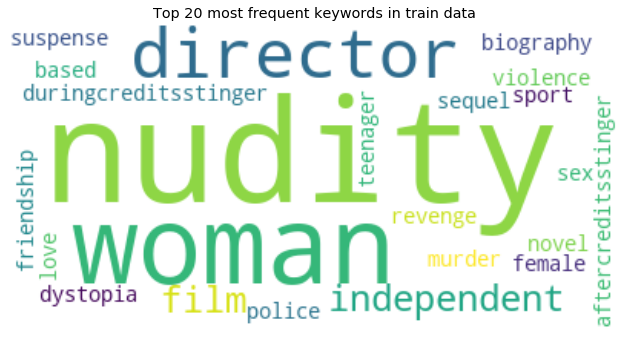

In [29]:
# Movie title text analysis 
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text = " ".join(review for review in list(key_top20.keys()))
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

fig = plt.figure(figsize=(11, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 20 most frequent keywords in train data')
plt.axis("off")
plt.show()

#### Top keywords by film type

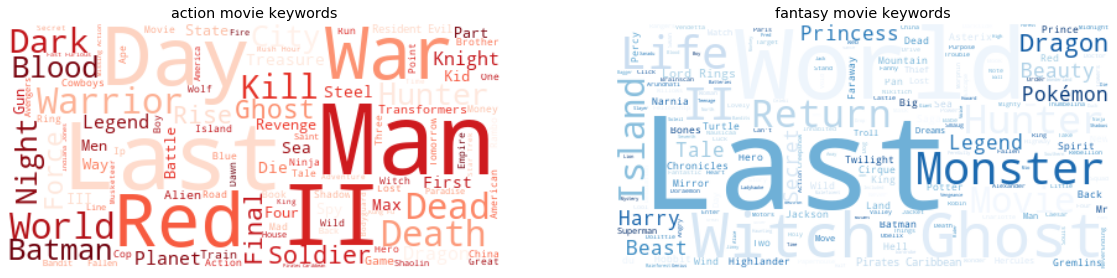

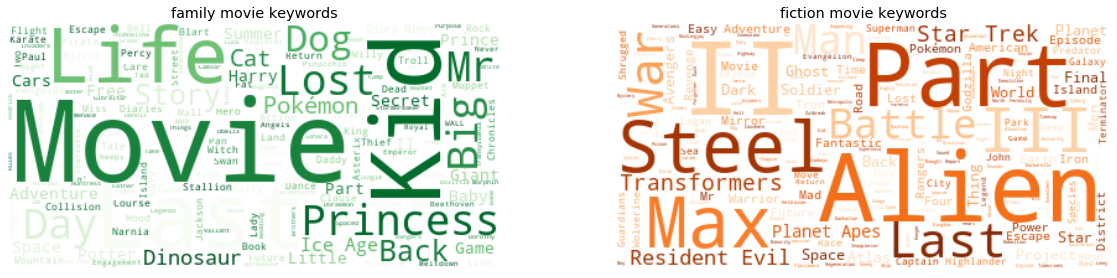

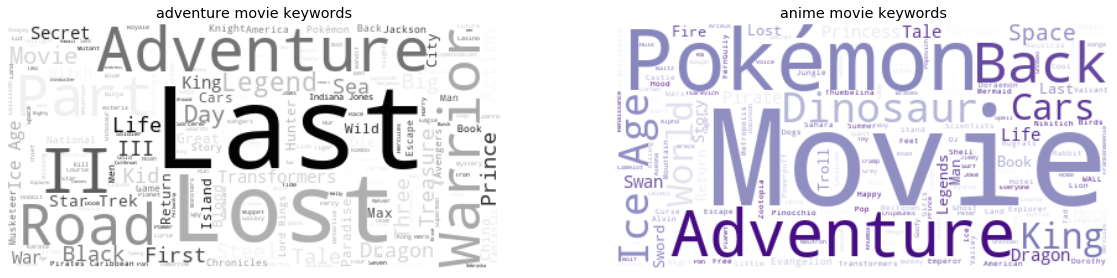

In [30]:
genre = ['gen_Action','gen_Fantasy','gen_Family','gen__Science Fiction','gen_Adventure','gen_Animation']

action = dft.loc[dft['gen_Action']==1,]
fantasy = dft.loc[dft['gen_Fantasy']==1,]
family = dft.loc[dft['gen_Family']==1,]
fiction = dft.loc[dft['gen_Science Fiction']==1,]
adventure = dft.loc[dft['gen_Adventure']==1,]
anime = dft.loc[dft['gen_Animation']==1,]

text_action = " ".join(review for review in action.title)
text_fantasy = " ".join(review for review in fantasy.title)
text_family = " ".join(review for review in family.title)
text_fiction = " ".join(review for review in fiction.title)
text_adventure = " ".join(review for review in adventure.title)
text_anime = " ".join(review for review in anime.title)

wordcloud1 = WordCloud(stopwords=stopwords, background_color="white",colormap="Reds").generate(text_action)
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white",colormap="Blues").generate(text_fantasy)
wordcloud3 = WordCloud(stopwords=stopwords, background_color="white",colormap="Greens").generate(text_family)
wordcloud4 = WordCloud(stopwords=stopwords, background_color="white",colormap="Oranges").generate(text_fiction)
wordcloud5 = WordCloud(stopwords=stopwords, background_color="white",colormap="Greys").generate(text_adventure)
wordcloud6 = WordCloud(stopwords=stopwords, background_color="white",colormap="Purples").generate(text_anime)

fig = plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('action movie keywords')
plt.axis("off")

plt.subplot(222)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('fantasy movie keywords')
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(20, 10))

plt.subplot(223)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title('family movie keywords')
plt.axis("off")

plt.subplot(224)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.title('fiction movie keywords')
plt.axis("off")
plt.show()

fig = plt.figure(figsize=(20, 10))

plt.subplot(223)
plt.imshow(wordcloud5, interpolation='bilinear')
plt.title('adventure movie keywords')
plt.axis("off")

plt.subplot(224)
plt.imshow(wordcloud6, interpolation='bilinear')
plt.title('anime movie keywords')
plt.axis("off")
plt.show()
    

In [31]:
dict_keyword = dict()
key_top20 = dict(Counter([j for i in wkeys for j in i]).most_common(50))

for feature in quanti:
    val=[]
    for i in list(key_top20.keys()):
        if feature=='runtime':
            val.append(dft[feature].loc[df_index('wordkey_list',i,dft)].mean()/60)
        else:
            val.append(dft[feature].loc[df_index('wordkey_list',i,dft)].mean())  
    dict_lang[feature] = val

        

output_notebook()


revenue = dict_lang['revenue']
budget = dict_lang['budget']
popularity = dict_lang['popularity']

group = pd.DataFrame.from_dict({"Wordkey":list(key_top20.keys()), 
                                "Nb_films":list(key_top20.values()), 
                                "Revenue":revenue, "Budget":budget, "Rating":popularity})
source = ColumnDataSource(group)
TOOLTIPS = """
     <p align="left">
         <em>Spoken Language</em> : 
         <strong>@Wordkey</strong></br>
         <em>Nb of Films</em>: 
         <font color=#cb2431><strong>@Nb_films</strong></font></br>
         <em>Mean Popularity</em>:
         <font color=#7f7fbf><strong>@Rating{0/1000000}</strong></font></br>
         <em>Mean Budget Per Film</em> : 
         <font color=#1f77b4><strong>@Budget{0,0.00} $</strong></font></br>
         <em>Mean Revenue Per Film</em> : 
         <font color=ff7f0e><strong>@Revenue{0,0.00} $</strong></font>
     </p>
"""

p1 = figure(y_range=list(key_top20.keys()),plot_width=600, plot_height=400,
           title="Mean Revenue and Budget for the Top 20")
graph1 = p1.hbar(y="Wordkey", right='Revenue', height=0.4, name='graph1',
                legend="Revenue ", color="#ff7f0e", source=source)
graph2 = p1.hbar(y="Wordkey", right='Budget', height=0.4, 
                legend="Budget ", color="#1f77b4", source=source)

p2 = figure(y_range=list(key_top20.keys()),plot_width=600, plot_height=400,
           title="Mean Popularity for the Top 20")
graph3 = p2.hbar(y="Wordkey", right='Rating', height=0.4
                 , color="#7f7fbf", source=source)

p1.xaxis.axis_label = "Mean Value"
p2.xaxis.axis_label = "Mean Value"
# hover = HoverTool(names=['graph1'])
##Or
hover1 = HoverTool()
hover1.renderers = [graph1]

hover1.tooltips = TOOLTIPS

hover2 = HoverTool()
hover2.renderers = [graph3]

hover2.tooltips = TOOLTIPS

p1.add_tools(hover1)
p2.add_tools(hover2)

show(row(p1,p2))

Loading BokehJS ...

In [32]:
dict_keyw = dict()
for i in list(key_top20.keys()):
    dict_keyw[i]= dft['revenue'].loc[df_index('wordkey_list',i,dft)].mean()

top_keyw = []
sort_val = list(dict_keyw.values())
sort_val.sort(reverse=True)
for i in list(dict_keyw.keys()):
    if dict_keyw[i] in sort_val[:6]:
        top_keyw.append(i)

for i in top_keyw:
    dft['key_'+i] = dft['wordkey_list'].apply(lambda x: indic_var(x,i))
    dftest['key_'+i] = dftest['wordkey_list'].apply(lambda x: indic_var(x,i))

dft['key_count'] = dft['wordkey_list'].apply(lambda x: len(x))
dftest['key_count'] = dftest['wordkey_list'].apply(lambda x: len(x))

dft.drop(['Keywords'],axis=1,inplace=True)
dftest.drop(['Keywords'],axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 52 columns):
id                                3000 non-null int64
budget                            3000 non-null int64
homepage                          946 non-null object
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
status                            3000 non-null object
tagline                           2403 non-null object
title                             3000 non-null object
cast                              3000 non-null object
crew          

### Cast Feature

**Top 20 Actors with the most films**

In [33]:
dft['cast_list'] = dft['cast'].apply(aux2)
dftest['cast_list'] = dftest['cast'].apply(aux2)
list_cast = list(dft['cast_list'].values)
cast_top20 = dict(Counter([j for i in list_cast for j in i]).most_common(80))


dict_cast = dict()

for feature in quanti:
    val=[]
    for i in list(cast_top20.keys()):
        val.append(dft[feature].loc[df_index('cast_list',i,dft)].mean())  
    dict_cast[feature] = val

        

output_notebook()


revenue = dict_cast['revenue']
budget = dict_cast['budget']
popularity = dict_cast['popularity']

group = pd.DataFrame.from_dict({"cast":list(cast_top20.keys()), 
                                "Nb_films":list(cast_top20.values()), 
                                "Revenue":revenue, "Budget":budget, "Rating":popularity})
source = ColumnDataSource(group)
TOOLTIPS = """
     <p align="left">
         <em>Actor</em> : 
         <strong>@cast</strong></br>
         <em>Nb of Films</em>: 
         <font color=#cb2431><strong>@Nb_films</strong></font></br>
         <em>Mean Popularity</em>:
         <font color=#7f7fbf><strong>@Rating{0/1000000}</strong></font></br>
         <em>Mean Budget Per Film</em> : 
         <font color=#1f77b4><strong>@Budget{0,0.00} $</strong></font></br>
         <em>Mean Revenue Per Film</em> : 
         <font color=ff7f0e><strong>@Revenue{0,0.00} $</strong></font>
     </p>
"""

p1 = figure(y_range=list(cast_top20.keys()),plot_width=800, plot_height=800,
           title="Mean Revenue and Budget for the Top 20")
graph1 = p1.hbar(y="cast", right='Revenue', height=0.4, name='graph1',
                legend="Revenue ", color="#ff7f0e", source=source)
graph2 = p1.hbar(y="cast", right='Budget', height=0.4, 
                legend="Budget ", color="#1f77b4", source=source)

p2 = figure(y_range=list(cast_top20.keys()),plot_width=800, plot_height=800,
           title="Mean Popularity for the Top 20")
graph3 = p2.hbar(y="cast", right='Rating', height=0.4
                 , color="#7f7fbf", source=source)

p1.xaxis.axis_label = "Mean Value"
p2.xaxis.axis_label = "Mean Value"
# hover = HoverTool(names=['graph1'])
##Or
hover1 = HoverTool()
hover1.renderers = [graph1]

hover1.tooltips = TOOLTIPS

hover2 = HoverTool()
hover2.renderers = [graph3]

hover2.tooltips = TOOLTIPS

p1.add_tools(hover1)
p2.add_tools(hover2)

show(row(p1,p2))

Loading BokehJS ...

In [34]:
cast_top20 = dict(Counter([j for i in list_cast for j in i]).most_common(100))

dict_cast = dict()

cast_name = []
cast_val = []
ind = 0
for i in list(cast_top20.keys()):
    val = dft['revenue'].loc[df_index('cast_list',i,dft)].mean()
    if val > 185000000 and cast_top20[i]>15:
        cast_name.append(i)
        cast_val.append(val)

In [35]:
top_cast = pd.DataFrame({'Name':cast_name,'Mean':cast_val})
top_cast.sort_values(by=['Mean'],ascending=False,inplace=True)

for i in list(top_cast.Name[:6].values):
    dft['cast_'+i] = dft['cast_list'].apply(lambda x: indic_var(x,i))
    dftest['cast_'+i] = dftest['cast_list'].apply(lambda x: indic_var(x,i))

dft['cast_count'] = dft['cast_list'].apply(lambda x: len(x))
dftest['cast_count'] = dftest['cast_list'].apply(lambda x: len(x))

dft.drop(['cast'],axis=1,inplace=True)
dftest.drop(['cast'],axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 59 columns):
id                                3000 non-null int64
budget                            3000 non-null int64
homepage                          946 non-null object
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
status                            3000 non-null object
tagline                           2403 non-null object
title                             3000 non-null object
crew                              3000 non-null object
revenue       

### Crew Feature

In [36]:
dft['crew_list'] = dft['crew'].apply(aux2)
dftest['crew_list'] = dftest['crew'].apply(aux2)
list_crew = list(dft['crew_list'].values)
crew_top20 = dict(Counter([j for i in list_crew for j in i]).most_common(20))

dict_crew = dict()

for feature in quanti:
    val=[]
    for i in list(crew_top20.keys()):
        val.append(dft[feature].loc[df_index('crew_list',i,dft)].mean())  
    dict_crew[feature] = val

        

output_notebook()


revenue = dict_crew['revenue']
budget = dict_crew['budget']
popularity = dict_crew['popularity']

group = pd.DataFrame.from_dict({"Crew":list(crew_top20.keys()), 
                                "Nb_films":list(crew_top20.values()), 
                                "Revenue":revenue, "Budget":budget, "Rating":popularity})
source = ColumnDataSource(group)
TOOLTIPS = """
     <p align="left">
         <em>Crew</em> : 
         <strong>@Crew</strong></br>
         <em>Nb of Films</em>: 
         <font color=#cb2431><strong>@Nb_films</strong></font></br>
         <em>Mean Popularity</em>:
         <font color=#7f7fbf><strong>@Rating{0/1000000}</strong></font></br>
         <em>Mean Budget Per Film</em> : 
         <font color=#1f77b4><strong>@Budget{0,0.00} $</strong></font></br>
         <em>Mean Revenue Per Film</em> : 
         <font color=ff7f0e><strong>@Revenue{0,0.00} $</strong></font>
     </p>
"""

crew_l = list(crew_top20.keys())

p1 = figure(y_range= crew_l,plot_width=600, plot_height=600,
           title="Mean Revenue and Budget for the Top 20")
graph1 = p1.hbar(y="Crew", right='Revenue', height=0.4, name='graph1',
                legend="Revenue ", color="#ff7f0e", source=source)
graph2 = p1.hbar(y="Crew", right='Budget', height=0.4, 
                legend="Budget ", color="#1f77b4", source=source)

p2 = figure(y_range=crew_l,plot_width=600, plot_height=600,
           title="Mean Popularity for the Top 20")
graph3 = p2.hbar(y="Crew", right='Rating', height=0.4
                 , color="#7f7fbf", source=source)

p1.xaxis.axis_label = "Mean Value"
p2.xaxis.axis_label = "Mean Value"
# hover = HoverTool(names=['graph1'])
##Or
hover1 = HoverTool()
hover1.renderers = [graph1]

hover1.tooltips = TOOLTIPS

hover2 = HoverTool()
hover2.renderers = [graph3]

hover2.tooltips = TOOLTIPS

p1.add_tools(hover1)
p2.add_tools(hover2)

show(row(p1,p2))

Loading BokehJS ...

In [37]:
crew_top20 = dict(Counter([j for i in list_crew for j in i]).most_common(100))

dict_crew = dict()

crew_name = []
crew_val = []
ind = 0
for i in list(crew_top20.keys()):
    val = dft['revenue'].loc[df_index('crew_list',i,dft)].mean()
    if val > 185000000 and crew_top20[i]>15:
        crew_name.append(i)
        crew_val.append(val)

In [38]:
top_crew = pd.DataFrame({'Name':crew_name,'Mean':crew_val})
top_crew.sort_values(by=['Mean'],ascending=False,inplace=True)

for i in list(top_crew.Name[:10].values):
    dft['crew_'+i] = dft['crew_list'].apply(lambda x: indic_var(x,i))
    dftest['crew_'+i] = dftest['crew_list'].apply(lambda x: indic_var(x,i))

dft['crew_count'] = dft['crew_list'].apply(lambda x: len(x))
dftest['crew_count'] = dftest['crew_list'].apply(lambda x: len(x))

dft.drop(['crew'],axis=1,inplace=True)
dftest.drop(['crew'],axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 70 columns):
id                                3000 non-null int64
budget                            3000 non-null int64
homepage                          946 non-null object
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
status                            3000 non-null object
tagline                           2403 non-null object
title                             3000 non-null object
revenue                           3000 non-null int64
genre_list     

### Homepage feature

In [55]:
dft['indic_HP'] = dft['homepage'].apply(lambda x: 0 if x is np.nan else 1)
dftest['indic_HP'] = dftest['homepage'].apply(lambda x: 0 if x is np.nan else 1)

dft.drop(['homepage'],axis=1,inplace=True)
dftest.drop(['homepage'],axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 70 columns):
id                                3000 non-null int64
budget                            3000 non-null int64
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
status                            3000 non-null object
tagline                           2403 non-null object
title                             3000 non-null object
revenue                           3000 non-null int64
genre_list                        3000 non-null object
gen_Adventure 

### Release Date Feature

In [73]:
def parse_date(x,option='day'):
    if not x is np.nan:
        if option=='month':
            m = re.match('(\d{1,2})/.*/.*',x)
        elif option=='day':
            m = re.match('.*/(\d{1,2})/.*',x)
        else:
            m = re.match('.*/.*/(\d{1,2})',x)
        if m:
            return float(m.group(1))
    return 0
    
for i in ['day','month','year']:
    dft[i] = dft['release_date'].apply(lambda x: parse_date(x,i))
    dftest[i] = dftest['release_date'].apply(lambda x: parse_date(x,i))

In [84]:
dft['quarter'] = dft['month'].apply(lambda x: x/4)
dftest['quarter'] = dftest['month'].apply(lambda x: x/4)
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 74 columns):
id                                3000 non-null int64
budget                            3000 non-null int64
imdb_id                           3000 non-null object
original_language                 3000 non-null object
original_title                    3000 non-null object
overview                          2992 non-null object
popularity                        3000 non-null float64
poster_path                       2999 non-null object
production_countries              2945 non-null object
release_date                      3000 non-null object
runtime                           2998 non-null float64
status                            3000 non-null object
tagline                           2403 non-null object
title                             3000 non-null object
revenue                           3000 non-null int64
genre_list                        3000 non-null object
gen_Adventure 

In [86]:
to_drop = ['original_title','original_language','imdb_id','original_language',
          'overview','poster_path','production_countries','tagline','release_date']

dft.drop(to_drop,axis=1,inplace=True)
dftest.drop(to_drop,axis=1,inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 66 columns):
id                                3000 non-null int64
budget                            3000 non-null int64
popularity                        3000 non-null float64
runtime                           2998 non-null float64
status                            3000 non-null object
title                             3000 non-null object
revenue                           3000 non-null int64
genre_list                        3000 non-null object
gen_Adventure                     3000 non-null int64
gen_Fantasy                       3000 non-null int64
gen_Animation                     3000 non-null int64
gen_Family                        3000 non-null int64
gen_Science Fiction               3000 non-null int64
gen_Action                        3000 non-null int64
genres_count                      3000 non-null int64
prod_list                         3000 non-null object
prod_Walt Disney Pict

In [87]:
quanti = [i for i in list(dft.columns.values) if (not i in ['title','status','id','collec'])  and '_list' not in i]
print(quanti)

['budget', 'popularity', 'runtime', 'revenue', 'gen_Adventure', 'gen_Fantasy', 'gen_Animation', 'gen_Family', 'gen_Science Fiction', 'gen_Action', 'genres_count', 'prod_Walt Disney Pictures', 'prod_Dune Entertainment', 'prod_New Line Cinema', 'prod_Village Roadshow Pictures', 'prod_Paramount Pictures', 'prod_Warner Bros.', 'prod_count', 'lang_Latin', 'lang_ภาษาไทย', 'lang_普通话', 'lang_العربية', 'lang_svenska', 'lang_Español', 'lang_count', 'indic_Coll', 'key_duringcreditsstinger', 'key_aftercreditsstinger', 'key_sequel', 'key_3d', 'key_based on comic', 'key_superhero', 'key_count', 'cast_Cate Blanchett', 'cast_Samuel L. Jackson', 'cast_Johnny Depp', 'cast_Frank Welker', 'cast_Stanley Tucci', 'cast_Bradley Cooper', 'cast_count', 'crew_Christopher Boyes', 'crew_Peter Jackson', 'crew_John Lasseter', 'crew_Stan Lee', 'crew_George Lucas', 'crew_Michael Bay', 'crew_John Williams', 'crew_Sarah Finn', 'crew_Steven Spielberg', 'crew_Hans Zimmer', 'crew_count', 'indic_HP', 'day', 'month', 'year',

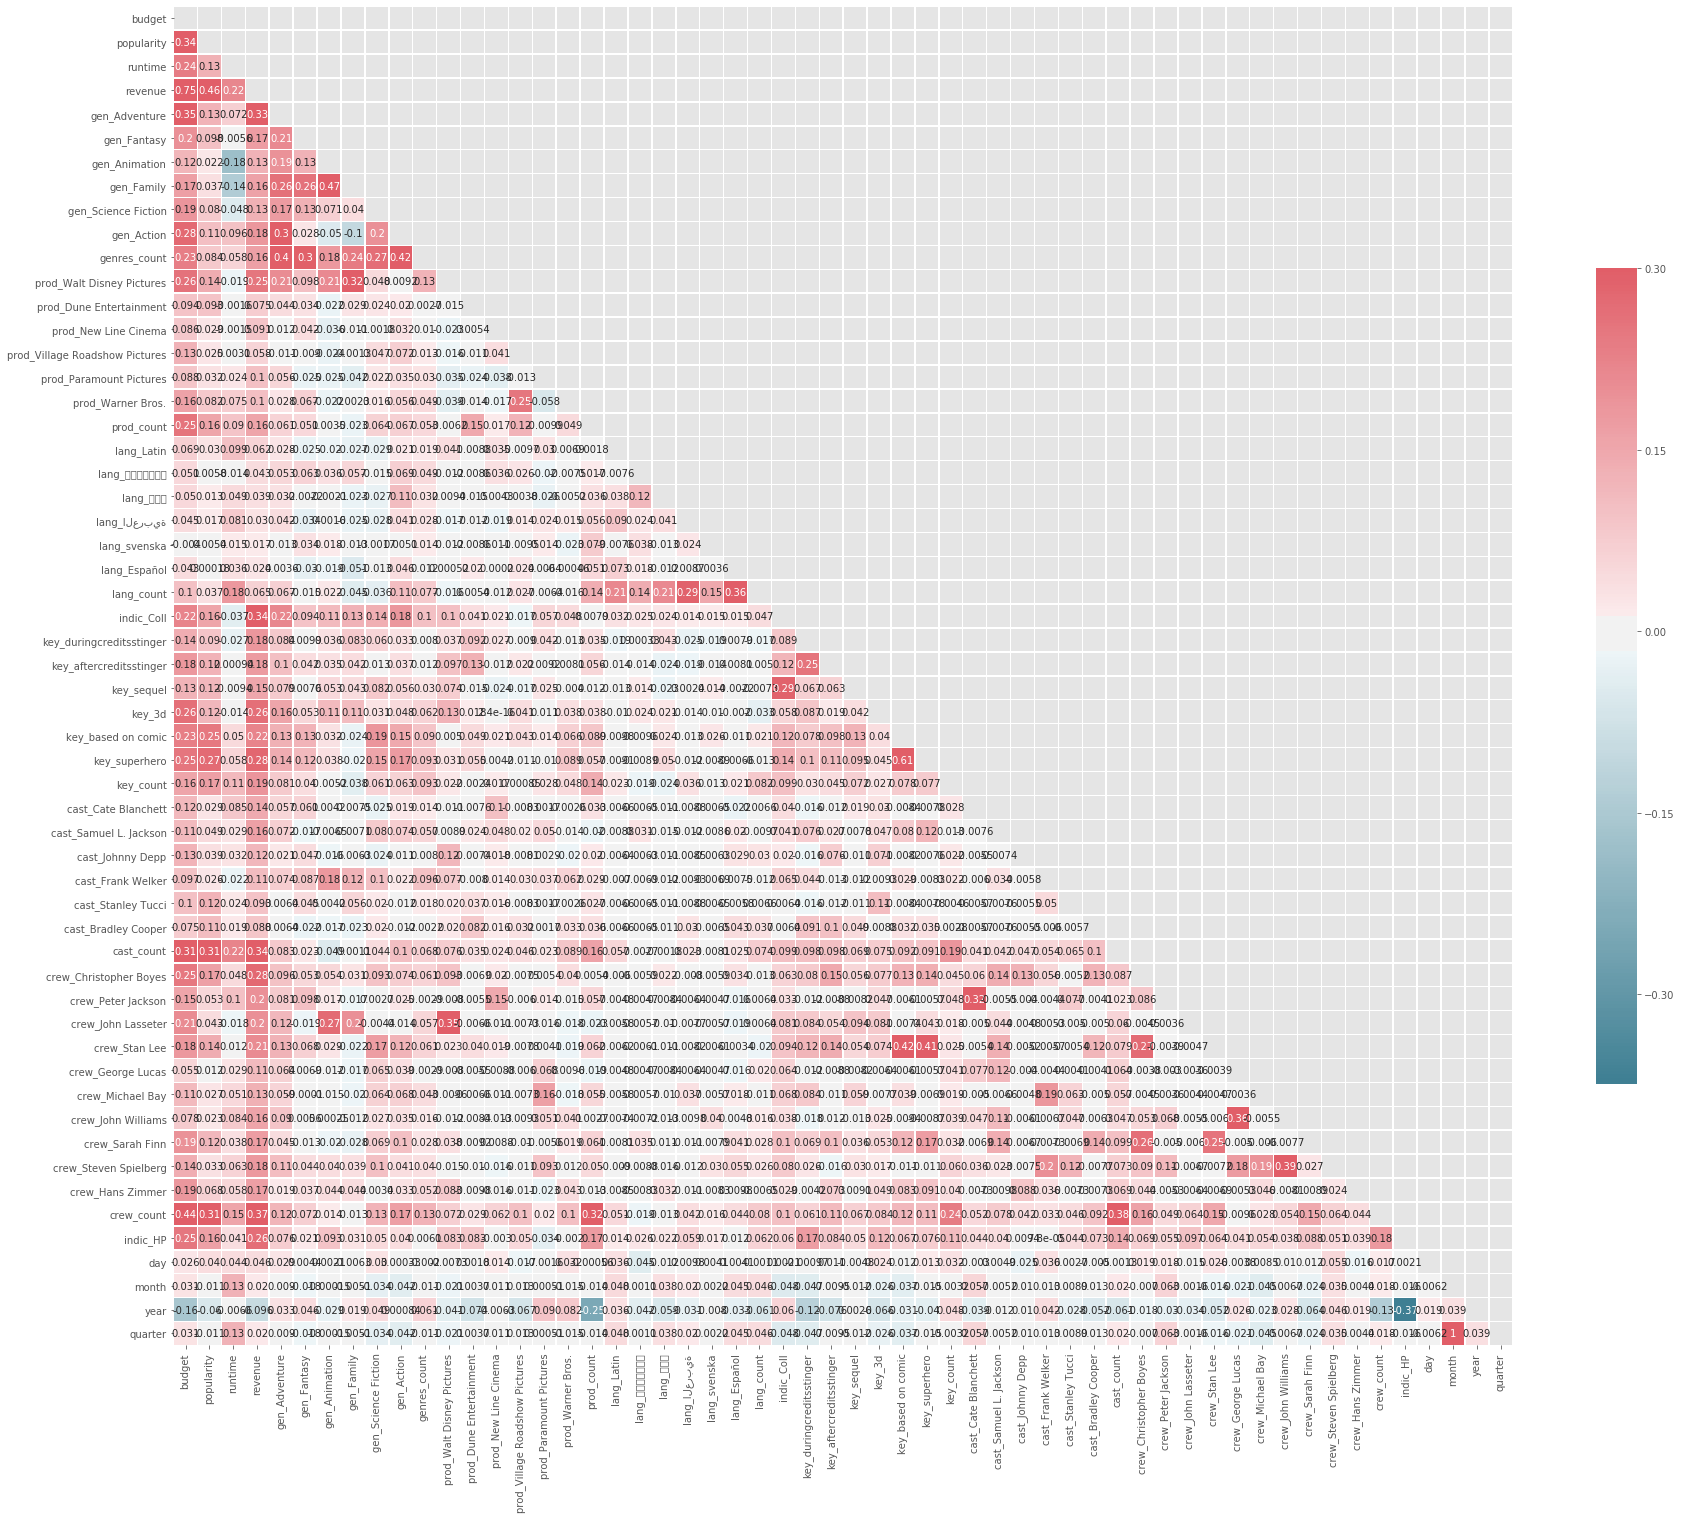

In [101]:
# Creating correlation matrix 
corr = dft[quanti].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(30, 30))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})

## Prediction of Revenue

In [104]:
# features_select= [i for i in list(df_Train.columns) if i not in ['id','release_date','status','title','revenue']]
features_select = [i for i in quanti if not i in ['day','month','year']]
print(features_select)

['budget', 'popularity', 'runtime', 'gen_Adventure', 'gen_Fantasy', 'gen_Animation', 'gen_Family', 'gen_Science Fiction', 'gen_Action', 'genres_count', 'prod_Walt Disney Pictures', 'prod_Dune Entertainment', 'prod_New Line Cinema', 'prod_Village Roadshow Pictures', 'prod_Paramount Pictures', 'prod_Warner Bros.', 'prod_count', 'lang_Latin', 'lang_ภาษาไทย', 'lang_普通话', 'lang_العربية', 'lang_svenska', 'lang_Español', 'lang_count', 'indic_Coll', 'key_duringcreditsstinger', 'key_aftercreditsstinger', 'key_sequel', 'key_3d', 'key_based on comic', 'key_superhero', 'key_count', 'cast_Cate Blanchett', 'cast_Samuel L. Jackson', 'cast_Johnny Depp', 'cast_Frank Welker', 'cast_Stanley Tucci', 'cast_Bradley Cooper', 'cast_count', 'crew_Christopher Boyes', 'crew_Peter Jackson', 'crew_John Lasseter', 'crew_Stan Lee', 'crew_George Lucas', 'crew_Michael Bay', 'crew_John Williams', 'crew_Sarah Finn', 'crew_Steven Spielberg', 'crew_Hans Zimmer', 'crew_count', 'indic_HP', 'quarter']


#### Scaling quantitative features

In [110]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

dft[['budget']] = scaler1.fit_transform(dft[['budget']])

dftest[['budget']] = scaler1.fit_transform(dftest[['budget']])

In [111]:
Y = dft['revenue']

X = dft.drop('revenue',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 65 columns):
id                                3000 non-null int64
budget                            3000 non-null float64
popularity                        3000 non-null float64
runtime                           2998 non-null float64
status                            3000 non-null object
title                             3000 non-null object
genre_list                        3000 non-null object
gen_Adventure                     3000 non-null int64
gen_Fantasy                       3000 non-null int64
gen_Animation                     3000 non-null int64
gen_Family                        3000 non-null int64
gen_Science Fiction               3000 non-null int64
gen_Action                        3000 non-null int64
genres_count                      3000 non-null int64
prod_list                         3000 non-null object
prod_Walt Disney Pictures         3000 non-null int64
prod_Dune Entertain

#### Imputing for NA in runtime feature

In [112]:
X[features_select].isna().sum()

budget                            0
popularity                        0
runtime                           2
gen_Adventure                     0
gen_Fantasy                       0
gen_Animation                     0
gen_Family                        0
gen_Science Fiction               0
gen_Action                        0
genres_count                      0
prod_Walt Disney Pictures         0
prod_Dune Entertainment           0
prod_New Line Cinema              0
prod_Village Roadshow Pictures    0
prod_Paramount Pictures           0
prod_Warner Bros.                 0
prod_count                        0
lang_Latin                        0
lang_ภาษาไทย                      0
lang_普通话                          0
lang_العربية                      0
lang_svenska                      0
lang_Español                      0
lang_count                        0
indic_Coll                        0
key_duringcreditsstinger          0
key_aftercreditsstinger           0
key_sequel                  

In [113]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X[['runtime']] = imp.fit_transform(X[['runtime']])

#### Split Samples

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Random Forest Regression

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[100,200,500], 'criterion':['mse'], 
               'max_depth':[80,100,200,300],'bootstrap':[True], 'oob_score':[True]}]

clf = RandomForestRegressor(random_state=42,n_jobs=-1,verbose=3)

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3)
#verbose option for display more logs on the screen, slowdown the algorithm

# Fit the grid search to the data
grid_search.fit(X_train[features_select],Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True, score=0.636, total=   2.2s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True, score=0.697, total=   0.9s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True, score=0.687, total=   0.8s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True, score=0.635, total=   0.8s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=100, oob_score=True, score=0.732, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True, score=0.637, total=   1.3s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True, score=0.698, total=   1.5s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True, score=0.686, total=   1.3s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True, score=0.629, total=   1.2s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=200, oob_score=True, score=0.732, total=   1.4s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True, score=0.638, total=   2.9s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True, score=0.698, total=   3.3s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True, score=0.693, total=   3.1s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True, score=0.624, total=   2.7s
[CV] bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV]  bootstrap=True, criterion=mse, max_depth=80, n_estimators=500, oob_score=True, score=0.731, total=   4.2s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True, score=0.636, total=   1.1s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True, score=0.697, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True, score=0.687, total=   0.9s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True, score=0.635, total=   1.1s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=100, oob_score=True, score=0.732, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True, score=0.637, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True, score=0.698, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True, score=0.686, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True, score=0.629, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=200, oob_score=True, score=0.732, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True, score=0.638, total=   4.3s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True, score=0.698, total=   4.4s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True, score=0.693, total=   4.1s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True, score=0.624, total=   4.1s
[CV] bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=100, n_estimators=500, oob_score=True, score=0.731, total=   4.6s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True, score=0.636, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True, score=0.697, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True, score=0.687, total=   0.9s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True, score=0.635, total=   0.9s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=100, oob_score=True, score=0.732, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True, score=0.637, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True, score=0.698, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True, score=0.686, total=   1.8s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True, score=0.629, total=   1.8s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=200, oob_score=True, score=0.732, total=   1.9s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True, score=0.638, total=   4.1s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True, score=0.698, total=   3.9s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True, score=0.693, total=   4.1s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True, score=0.624, total=   4.4s
[CV] bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=200, n_estimators=500, oob_score=True, score=0.731, total=   4.1s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True, score=0.636, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True, score=0.697, total=   0.9s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True, score=0.687, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True, score=0.635, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=100, oob_score=True, score=0.732, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True, score=0.637, total=   1.8s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True, score=0.698, total=   1.8s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True, score=0.686, total=   2.0s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True, score=0.629, total=   1.9s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=200, oob_score=True, score=0.732, total=   1.7s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True, score=0.638, total=   4.2s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True, score=0.698, total=   3.5s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True, score=0.693, total=   3.6s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True, score=0.624, total=   3.4s
[CV] bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV]  bootstrap=True, criterion=mse, max_depth=300, n_estimators=500, oob_score=True, score=0.731, total=   3.4s
building tree 1 of 100
building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 25 of 100
building tree 26 of 100building tree 27 of 100

building tree 28 of 100building tree 29 of 100

building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s


building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100building tree 79 of 100

building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=3, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [True], 'criterion': 

In [116]:
print(grid_search.best_params_)

def evaluate(model, test_features, test_labels):
    # Use the forest's predict method on the test data
    predictions = model.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * np.mean(errors / test_labels)
    
    # Calculate and display accuracy
    accuracy = 100 - mape
    
    print('Model Performance')
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error: {:0.4f} degrees.'.format(np.mean(errors)))
    
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test[features_select],Y_test)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 80, 'n_estimators': 100, 'oob_score': True}
Model Performance
Mean Absolute Error: 36806584.2350 degrees.
Accuracy = -2141500.48%.


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Very bad result!!

### Methods for features selection
#### Random Forest method

In [126]:
from sklearn.feature_selection import SelectFromModel

# Finally selecting the most important features
sfm = SelectFromModel(clf, threshold=0.05)#all variables with score under 0.05 are excluded
sfm.fit(X_train[features_select],Y_train)
 
dft_quant = X_train[features_select].copy()
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(dft_quant.columns[feature_list_index])

/home/djebali/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
budget
popularity
runtime


#### Extra Trees method

In [121]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_test[features_select], Y_test)

importance= pd.DataFrame({'Features':features_select,'Scores':model.feature_importances_})
importance.sort_values(by=['Scores'],ascending=False,inplace=True)
importance.head(20)

/home/djebali/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Features,Scores
0,budget,0.417234
1,popularity,0.071249
3,gen_Adventure,0.065739
50,indic_HP,0.063092
24,indic_Coll,0.039020
45,crew_John Williams,0.031304
2,runtime,0.027038
38,cast_count,0.026169
34,cast_Johnny Depp,0.018108
49,crew_count,0.017665


#### Recursive Feature Elimination

In [130]:
from sklearn.feature_selection import RFE

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

model =  GradientBoostingRegressor(random_state=42, loss='ls',verbose=3)
rfe = RFE(model)
fit = rfe.fit(X_train[features_select], Y_train)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))

      Iter       Train Loss   Remaining Time 
         1 17715296295863340.0000            0.81s
         2 15588570306878078.0000            0.74s
         3 13843104139830780.0000            0.67s
         4 12334202291227248.0000            0.63s
         5 11137215829498974.0000            0.58s
         6 10099228483150216.0000            0.54s
         7 9252522019311980.0000            0.50s
         8 8507389934369387.0000            0.46s
         9 7837910104814386.0000            0.44s
        10 7289393962857557.0000            0.43s
        11 6848580837824780.0000            0.41s
        12 6446887455894128.0000            0.39s
        13 6110027387681287.0000            0.38s
        14 5825374257863771.0000            0.38s
        15 5534890741543241.0000            0.39s
        16 5293249191135337.0000            0.38s
        17 5113764111804573.0000            0.36s
        18 4931758909098102.0000            0.35s
        19 4776297639070099.0000            0.35

        25 4100597235643133.0000            0.18s
        26 4018166194284180.5000            0.18s
        27 3943753234266514.0000            0.17s
        28 3870257829079260.0000            0.17s
        29 3791438396875702.0000            0.17s
        30 3713200313818073.0000            0.17s
        31 3676140046801363.0000            0.17s
        32 3621282008715875.0000            0.17s
        33 3571259063423189.5000            0.17s
        34 3524541309682313.5000            0.17s
        35 3499432415824670.5000            0.17s
        36 3456273597281910.0000            0.17s
        37 3420880543279821.5000            0.17s
        38 3381813371186748.5000            0.17s
        39 3362943040104305.0000            0.16s
        40 3325859704811025.0000            0.16s
        41 3294988010133749.5000            0.15s
        42 3256596333038438.0000            0.15s
        43 3220055035918802.5000            0.15s
        44 3187126239105586.0000            0.15s


        91 2400908681752589.5000            0.02s
        92 2390293906489040.0000            0.02s
        93 2386159155033652.5000            0.02s
        94 2379504069585274.5000            0.01s
        95 2368899867152405.0000            0.01s
        96 2361242730970566.5000            0.01s
        97 2352842717810892.5000            0.01s
        98 2342052687645491.0000            0.00s
        99 2335777503627390.0000            0.00s
       100 2326819767283499.5000            0.00s
      Iter       Train Loss   Remaining Time 
         1 17715296295863340.0000            0.26s
         2 15588570306878078.0000            0.25s
         3 13843104139830780.0000            0.24s
         4 12334202291227248.0000            0.24s
         5 11137215829498974.0000            0.24s
         6 10099228483150218.0000            0.23s
         7 9252522019311982.0000            0.23s
         8 8507389934369387.0000            0.22s
         9 7837910104814387.0000            0.22

        56 2902638107762117.0000            0.10s
        57 2889450779220475.0000            0.10s
        58 2866747118618499.5000            0.10s
        59 2847129717588416.0000            0.10s
        60 2824244668793312.5000            0.10s
        61 2814250003702596.5000            0.09s
        62 2793740072404869.0000            0.09s
        63 2778501460447138.5000            0.09s
        64 2761886491385769.0000            0.08s
        65 2742811347682646.5000            0.08s
        66 2723316626919320.5000            0.08s
        67 2709042993952835.0000            0.08s
        68 2695408749883493.5000            0.08s
        69 2683941570800639.0000            0.07s
        70 2670489258861737.5000            0.07s
        71 2647004023862411.5000            0.07s
        72 2633544443252545.5000            0.07s
        73 2619808690313457.5000            0.06s
        74 2600241149005191.0000            0.06s
        75 2586239093940244.0000            0.06s


        30 3713200313818073.0000            0.16s
        31 3676140046801363.0000            0.15s
        32 3621282008715875.0000            0.15s
        33 3571259063423189.5000            0.15s
        34 3524541309682313.5000            0.15s
        35 3499432415824670.5000            0.15s
        36 3456273597281910.0000            0.14s
        37 3420880543279821.5000            0.14s
        38 3381813371186748.5000            0.14s
        39 3362943040104305.0000            0.14s
        40 3325859704811025.5000            0.14s
        41 3294988010133750.0000            0.14s
        42 3256596333038438.0000            0.14s
        43 3220055035918802.5000            0.14s
        44 3187126239105586.5000            0.14s
        45 3150753125273126.0000            0.13s
        46 3127379373059510.0000            0.13s
        47 3111881336821768.0000            0.13s
        48 3088974037588869.5000            0.13s
        49 3066716776034338.5000            0.12s


         4 12334202291227248.0000            0.26s
         5 11137215829498974.0000            0.25s
         6 10099228483150218.0000            0.24s
         7 9252522019311982.0000            0.24s
         8 8507389934369387.0000            0.23s
         9 7837910104814386.0000            0.23s
        10 7289393962857558.0000            0.23s
        11 6848580837824780.0000            0.23s
        12 6446887455894128.0000            0.23s
        13 6110027387681287.0000            0.22s
        14 5825374257863771.0000            0.22s
        15 5534890741543241.0000            0.23s
        16 5293249191135337.0000            0.23s
        17 5113764111804573.0000            0.22s
        18 4931758909098102.0000            0.21s
        19 4776297639070099.0000            0.21s
        20 4653497746578520.0000            0.20s
        21 4533358214016043.0000            0.20s
        22 4420068504969971.0000            0.20s
        23 4294898210444272.5000            0.2

        79 2526006888165537.5000            0.05s
        80 2506517970484040.5000            0.04s
        81 2493542964010214.0000            0.04s
        82 2486998339996205.0000            0.04s
        83 2478593791472259.0000            0.04s
        84 2468920421168194.0000            0.03s
        85 2459535262900278.0000            0.03s
        86 2448802781570270.0000            0.03s
        87 2440420456201664.5000            0.03s
        88 2424297006586831.0000            0.03s
        89 2419939708477129.0000            0.02s
        90 2411003463176900.0000            0.02s
        91 2401288461289658.0000            0.02s
        92 2390520859312564.5000            0.02s
        93 2375165135301857.0000            0.02s
        94 2365473731527604.5000            0.01s
        95 2362876239487955.0000            0.01s
        96 2348750727736220.0000            0.01s
        97 2343616078844779.0000            0.01s
        98 2336577203149878.0000            0.00s


        61 2819122856491762.0000            0.09s
        62 2791206915572615.0000            0.08s
        63 2777239148426973.5000            0.08s
        64 2763601795290531.5000            0.08s
        65 2743958011745213.0000            0.08s
        66 2729812133790223.0000            0.08s
        67 2713629243486276.0000            0.07s
        68 2695456820242789.5000            0.07s
        69 2683808868103588.5000            0.07s
        70 2665373328369685.0000            0.07s
        71 2639567460631301.5000            0.07s
        72 2620656373135635.0000            0.06s
        73 2595677778150859.5000            0.06s
        74 2584568704998764.0000            0.06s
        75 2577040338599969.5000            0.06s
        76 2567042795498011.0000            0.06s
        77 2552282835429980.0000            0.05s
        78 2540395597600645.5000            0.05s
        79 2526006888165537.5000            0.05s
        80 2506517970484040.0000            0.05s


        28 3870257829079260.0000            0.15s
        29 3791438396875702.0000            0.15s
        30 3713200313818073.0000            0.15s
        31 3676140046801363.0000            0.15s
        32 3621282008715875.0000            0.14s
        33 3571259063423189.5000            0.14s
        34 3524541309682313.5000            0.14s
        35 3499432415824670.5000            0.14s
        36 3456273597281910.5000            0.14s
        37 3422327228819764.5000            0.14s
        38 3383244598565135.0000            0.14s
        39 3364291033577310.5000            0.14s
        40 3327215540437857.0000            0.13s
        41 3296334520899376.5000            0.14s
        42 3257942492006211.5000            0.14s
        43 3221409879981553.0000            0.13s
        44 3188479997874765.5000            0.13s
        45 3152113839687816.0000            0.13s
        46 3128753179003851.0000            0.13s
        47 3113269537486569.5000            0.13s


        68 2632014141611807.5000            0.07s
        69 2617277595502164.5000            0.06s
        70 2609801769560859.5000            0.06s
        71 2588401031177589.5000            0.06s
        72 2578182350059626.5000            0.06s
        73 2574695659527628.5000            0.06s
        74 2564465215670709.0000            0.05s
        75 2541523619838152.5000            0.05s
        76 2519719331881001.5000            0.05s
        77 2506686869685910.0000            0.05s
        78 2496302438123877.5000            0.05s
        79 2477511029698933.5000            0.04s
        80 2466719026701044.0000            0.04s
        81 2447468609656278.0000            0.04s
        82 2438928417156982.5000            0.04s
        83 2427179062799026.5000            0.04s
        84 2403094221071873.5000            0.03s
        85 2387269260273172.5000            0.03s
        86 2384753232904752.0000            0.03s
        87 2374252961307280.0000            0.03s


        42 3212306424044443.5000            0.13s
        43 3184430042206161.0000            0.13s
        44 3156839044982960.0000            0.13s
        45 3125501472997148.0000            0.13s
        46 3087446855601381.5000            0.13s
        47 3054855865792177.5000            0.13s
        48 3026892825429987.0000            0.13s
        49 2998578204963182.5000            0.13s
        50 2969220973948673.0000            0.13s
        51 2949181637214156.0000            0.12s
        52 2925071143091384.5000            0.12s
        53 2902832600523145.0000            0.12s
        54 2877812955466800.5000            0.12s
        55 2843946711699521.5000            0.11s
        56 2825688194925868.0000            0.11s
        57 2800090928032102.5000            0.11s
        58 2782504322131795.5000            0.11s
        59 2757706877845983.5000            0.10s
        60 2741723031149092.0000            0.10s
        61 2721597160274835.0000            0.10s


        94 2382143634647201.0000            0.01s
        95 2377999130719463.0000            0.01s
        96 2354573667186755.0000            0.01s
        97 2339719978508818.5000            0.01s
        98 2326908309891080.0000            0.00s
        99 2306801616204815.0000            0.00s
       100 2300162695175199.5000            0.00s
      Iter       Train Loss   Remaining Time 
         1 17715296295863340.0000            0.21s
         2 15588570306878076.0000            0.21s
         3 13843104139830780.0000            0.20s
         4 12334202291227248.0000            0.21s
         5 11137215829498974.0000            0.22s
         6 10099228483150216.0000            0.22s
         7 9252522019311980.0000            0.22s
         8 8507389934369387.0000            0.21s
         9 7837910104814386.0000            0.21s
        10 7289393962857557.0000            0.21s
        11 6848580837824779.0000            0.20s
        12 6446887455894128.0000            0.20

         4 12334202291227248.0000            0.15s
         5 11137215829498974.0000            0.17s
         6 10099228483150218.0000            0.17s
         7 9252522019311982.0000            0.17s
         8 8507389934369387.0000            0.17s
         9 7837910104814387.0000            0.17s
        10 7289393962857557.0000            0.19s
        11 6848580837824780.0000            0.19s
        12 6446887455894128.0000            0.18s
        13 6110027387681288.0000            0.18s
        14 5825374257863771.0000            0.17s
        15 5534890741543241.0000            0.17s
        16 5293249191135338.0000            0.16s
        17 5113764111804573.0000            0.16s
        18 4931758909098102.0000            0.16s
        19 4776297639070099.0000            0.15s
        20 4653497746578520.0000            0.15s
        21 4533358214016043.0000            0.15s
        22 4420068504969970.5000            0.14s
        23 4294898210444272.5000            0.1

        32 3611805996827656.0000            0.11s
        33 3584582032590486.5000            0.11s
        34 3537433193048034.0000            0.11s
        35 3495308614285424.5000            0.11s
        36 3448918992196728.0000            0.11s
        37 3428743453207916.0000            0.11s
        38 3395799045175606.0000            0.11s
        39 3372279195551231.5000            0.11s
        40 3334857193556629.0000            0.11s
        41 3314801485346826.0000            0.10s
        42 3281087739060740.5000            0.10s
        43 3263438818164288.5000            0.10s
        44 3236053736638986.5000            0.10s
        45 3197867778197940.5000            0.10s
        46 3158319240269456.0000            0.09s
        47 3130158533975964.5000            0.09s
        48 3106986045682384.0000            0.09s
        49 3076539269267157.0000            0.09s
        50 3054157391112498.5000            0.09s
        51 3046244576290169.0000            0.08s


In [133]:
print("Number of the features : "+str(len(features_select)))
importance= pd.DataFrame({'Features':features_select,'Scores':fit.ranking_})
importance.sort_values(by=['Scores'],ascending=True,inplace=True)
importance.head(30)

Number of the features : 52


,Features,Scores
0,budget,1
49,crew_count,1
48,crew_Hans Zimmer,1
45,crew_John Williams,1
44,crew_Michael Bay,1
38,cast_count,1
35,cast_Frank Welker,1
33,cast_Samuel L. Jackson,1
31,key_count,1
30,key_superhero,1


In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


param_grid1 = [{'n_estimators':[100,200,500], 'max_depth':[80,100,200,300],
                'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1]}]

clf1 =  GradientBoostingRegressor(random_state=42, loss='ls',verbose=3)

grid_search1 = GridSearchCV(clf1, param_grid1, cv=5, verbose=3)
#verbose option for display more logs on the screen, slowdown the algorithm

# Fit the grid search to the data
grid_search1.fit(X_train[features_select],Y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] learning_rate=0.001, max_depth=80, n_estimators=100 .............
      Iter       Train Loss   Remaining Time 
         1 21761093278203460.0000            5.77s
         2 21717592852740328.0000            5.03s
         3 21674179384627704.0000            4.74s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         4 21630852700037832.0000            4.62s
         5 21587612625490456.0000            4.58s
         6 21544458987852100.0000            4.46s
         7 21501391614335384.0000            4.37s
         8 21458410332498328.0000            4.30s
         9 21415514970243664.0000            4.32s
        10 21372705355818144.0000            4.26s
        11 21329981317811860.0000            4.20s
        12 21287342685157560.0000            4.14s
        13 21244789287129924.0000            4.06s
        14 21202320953344956.0000            4.03s
        15 21159937513759220.0000            4.00s
        16 21117638798669216.0000            3.93s
        17 21075424638710676.0000            3.87s
        18 21033294864857892.0000            3.81s
        19 20991249308423044.0000            3.80s
        20 20949287801055504.0000            3.84s
        21 20907410174741196.0000            3.84s
        22 20865616261801888.0000            3.82s
        23 20823905894894544.00

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


         1 20825999417192928.0000            7.23s
         2 20784368244357960.0000            6.09s
         3 20742820292237484.0000            5.44s
         4 20701355394473308.0000            5.22s
         5 20659973385039756.0000            5.00s
         6 20618674098243060.0000            4.93s
         7 20577457368720668.0000            4.78s
         8 20536323031440596.0000            4.66s
         9 20495270921700748.0000            4.55s
        10 20454300875128268.0000            4.42s
        11 20413412727678888.0000            4.34s
        12 20372606315636256.0000            4.24s
        13 20331881475611300.0000            4.15s
        14 20291238044541552.0000            4.07s
        15 20250675859690512.0000            4.01s
        16 20210194758646992.0000            3.94s
        17 20169794579324460.0000            3.89s
        18 20129475159960388.0000            3.81s
        19 20089236339115624.0000            3.75s
        20 20049077955673736.00

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s


         3 17903978622049632.0000            4.25s
         4 17868188568784154.0000            4.15s
         5 17832470059835152.0000            4.14s
         6 17796822952185544.0000            4.09s
         7 17761247103104124.0000            4.04s
         8 17725742370145020.0000            3.99s
         9 17690308611147100.0000            3.96s
        10 17654945684233414.0000            3.92s
        11 17619653447810634.0000            3.87s
        12 17584431760568460.0000            3.83s
        13 17549280481479084.0000            3.79s
        14 17514199469796606.0000            3.75s
        15 17479188585056484.0000            3.70s
        16 17444247687074956.0000            3.66s
        17 17409376635948490.0000            3.63s
        18 17374575292053234.0000            3.59s
        19 17339843516044418.0000            3.55s
        20 17305181168855842.0000            3.50s
        21 17270588111699300.0000            3.46s
        22 17236064206064016.00

        61 18880201212239960.0000            1.94s
        62 18842459690016692.0000            1.88s
        63 18804793613096348.0000            1.83s
        64 18767202830663768.0000            1.79s
        65 18729687192205272.0000            1.75s
        66 18692246547508052.0000            1.70s
        67 18654880746659584.0000            1.66s
        68 18617589640047012.0000            1.60s
        69 18580373078356560.0000            1.55s
        70 18543230912572924.0000            1.50s
        71 18506162993978688.0000            1.45s
        72 18469169174153728.0000            1.40s
        73 18432249304974596.0000            1.35s
        74 18395403238613948.0000            1.31s
        75 18358630827539960.0000            1.27s
        76 18321931924515708.0000            1.23s
        77 18285306382598600.0000            1.18s
        78 18248754055139788.0000            1.13s
        79 18212274795783560.0000            1.09s
        80 18175868458466792.00

        15 21159937513759220.0000            8.23s
        16 21117638798669216.0000            8.17s
        17 21075424638710676.0000            8.10s
        18 21033294864857892.0000            8.04s
        19 20991249308423044.0000            7.98s
        20 20949287801055504.0000            7.92s
        21 20907410174741196.0000            7.86s
        22 20865616261801888.0000            7.80s
        23 20823905894894544.0000            7.75s
        24 20782278907010652.0000            7.69s
        25 20740735131475536.0000            7.64s
        26 20699274401947716.0000            7.58s
        27 20657896552418224.0000            7.60s
        28 20616601417209936.0000            7.55s
        29 20575388830976936.0000            7.50s
        30 20534258628703812.0000            7.45s
        31 20493210645705032.0000            7.40s
        32 20452244717624272.0000            7.36s
        33 20411360680433736.0000            7.32s
        34 20370558370433552.00

       178 15270861648886810.0000            0.98s
       179 15240335196450684.0000            0.93s
       180 15209869766392976.0000            0.89s
       181 15179465236729958.0000            0.84s
       182 15149121485721738.0000            0.80s
       183 15118838391871778.0000            0.76s
       184 15088615833926426.0000            0.72s
       185 15058453690874406.0000            0.67s
       186 15028351841946348.0000            0.63s
       187 14998310166614296.0000            0.58s
       188 14968328544591234.0000            0.54s
       189 14938406855830600.0000            0.50s
       190 14908544980525794.0000            0.45s
       191 14878742799109724.0000            0.41s
       192 14849000192254300.0000            0.36s
       193 14819317040869984.0000            0.32s
       194 14789693226105286.0000            0.27s
       195 14760128629346302.0000            0.23s
       196 14730623132216238.0000            0.18s
       197 14701176616574938.00

       138 15832504707205244.0000            3.12s
       139 15800855530295546.0000            3.07s
       140 15769269620090480.0000            3.03s
       141 15737746850119922.0000            2.98s
       142 15706287094166532.0000            2.93s
       143 15674890226265294.0000            2.89s
       144 15643556120702986.0000            2.83s
       145 15612284652017702.0000            2.78s
       146 15581075694998318.0000            2.74s
       147 15549929124684016.0000            2.69s
       148 15518844816363774.0000            2.64s
       149 15487822645575864.0000            2.59s
       150 15456862488107356.0000            2.54s
       151 15425964219993630.0000            2.49s
       152 15395127717517862.0000            2.44s
       153 15364352857210544.0000            2.39s
       154 15333639515848982.0000            2.33s
       155 15302987570456800.0000            2.28s
       156 15272396898303454.0000            2.23s
       157 15241867376903746.00

        95 14893589659106874.0000            4.48s
        96 14863817373378320.0000            4.44s
        97 14834104602448940.0000            4.40s
        98 14804451227348646.0000            4.35s
        99 14774857129345172.0000            4.31s
       100 14745322189943610.0000            4.27s
       101 14715846290885914.0000            4.23s
       102 14686429314150432.0000            4.18s
       103 14657071141951446.0000            4.14s
       104 14627771656738686.0000            4.09s
       105 14598530741196866.0000            4.05s
       106 14569348278245212.0000            4.01s
       107 14540224151037000.0000            3.97s
       108 14511158242959076.0000            3.92s
       109 14482150437631404.0000            3.88s
       110 14453200618906578.0000            3.83s
       111 14424308670869382.0000            3.79s
       112 14395474477836314.0000            3.75s
       113 14366697924355120.0000            3.71s
       114 14337978895204336.00

        55 19108243180728812.0000            6.69s
        56 19070045802610536.0000            6.64s
        57 19031924781051120.0000            6.59s
        58 18993879963413796.0000            6.54s
        59 18955911197366932.0000            6.49s
        60 18918018330883392.0000            6.44s
        61 18880201212239960.0000            6.40s
        62 18842459690016692.0000            6.35s
        63 18804793613096348.0000            6.33s
        64 18767202830663768.0000            6.31s
        65 18729687192205272.0000            6.28s
        66 18692246547508052.0000            6.25s
        67 18654880746659584.0000            6.23s
        68 18617589640047012.0000            6.19s
        69 18580373078356560.0000            6.14s
        70 18543230912572924.0000            6.09s
        71 18506162993978688.0000            6.07s
        72 18469169174153728.0000            6.04s
        73 18432249304974596.0000            6.01s
        74 18395403238613948.00

        16 18799249017783516.0000            8.54s
        17 18761669318996968.0000            8.52s
        18 18724164742028292.0000            8.49s
        19 18686735136708976.0000            8.54s
        20 18649380353170696.0000            8.62s
        21 18612100241844708.0000            8.61s
        22 18574894653461260.0000            8.61s
        23 18537763439048988.0000            8.66s
        24 18500706449934332.0000            8.66s
        25 18463723537740912.0000            8.61s
        26 18426814554388968.0000            8.53s
        27 18389979352094744.0000            8.46s
        28 18353217783369904.0000            8.48s
        29 18316529701020952.0000            8.51s
        30 18279914958148612.0000            8.52s
        31 18243373408147268.0000            8.50s
        32 18206904904704384.0000            8.50s
        33 18170509301799880.0000            8.51s
        34 18134186453705580.0000            8.53s
        35 18097936214984624.00

       179 13567182354242276.0000            1.19s
       180 13540061556716146.0000            1.13s
       181 13512994973664272.0000            1.08s
       182 13485982496711916.0000            1.02s
       183 13459024017700988.0000            0.97s
       184 13432119428689604.0000            0.91s
       185 13405268621951656.0000            0.85s
       186 13378471489976374.0000            0.80s
       187 13351727925467910.0000            0.74s
       188 13325037821344900.0000            0.69s
       189 13298401070740032.0000            0.63s
       190 13271817566999624.0000            0.57s
       191 13245287203683190.0000            0.52s
       192 13218809874563026.0000            0.46s
       193 13192385473623776.0000            0.40s
       194 13166013895062004.0000            0.35s
       195 13139695033285774.0000            0.29s
       196 13113428782914234.0000            0.23s
       197 13087215038777188.0000            0.17s
       198 13061053695914674.00

       138 16543389100292560.0000           20.61s
       139 16510318865481076.0000           20.54s
       140 16477314738068976.0000           20.47s
       141 16444376585907580.0000           20.40s
       142 16411504277112348.0000           20.33s
       143 16378697680062402.0000           20.27s
       144 16345956663399958.0000           20.20s
       145 16313281096029820.0000           20.13s
       146 16280670847118856.0000           20.06s
       147 16248125786095468.0000           20.00s
       148 16215645782649060.0000           19.94s
       149 16183230706729544.0000           19.90s
       150 16150880428546792.0000           19.85s
       151 16118594818570128.0000           19.81s
       152 16086373747527808.0000           19.75s
       153 16054217086406498.0000           19.70s
       154 16022124706450770.0000           19.64s
       155 15990096479162576.0000           19.58s
       156 15958132276300728.0000           19.51s
       157 15926231969880406.00

       299 11987032787479096.0000           11.97s
       300 11963070708936926.0000           11.91s
       301 11939156530589762.0000           11.85s
       302 11915290156685114.0000           11.79s
       303 11891471491661898.0000           11.73s
       304 11867700440150066.0000           11.66s
       305 11843976906970206.0000           11.60s
       306 11820300797133172.0000           11.54s
       307 11796672015839706.0000           11.48s
       308 11773090468480040.0000           11.41s
       309 11749556060633548.0000           11.35s
       310 11726068698068342.0000           11.29s
       311 11702628286740902.0000           11.23s
       312 11679234732795708.0000           11.17s
       313 11655887942564852.0000           11.11s
       314 11632587822567664.0000           11.04s
       315 11609334279510352.0000           10.98s
       316 11586127220285608.0000           10.92s
       317 11562966551972258.0000           10.86s
       318 11539852181834864.00

       463 8633598165081274.0000            2.16s
       464 8616339602349277.0000            2.10s
       465 8599115539484180.0000            2.04s
       466 8581925907520751.0000            1.98s
       467 8564770637631618.0000            1.93s
       468 8547649661126992.0000            1.87s
       469 8530562909454400.0000            1.81s
       470 8513510314198400.0000            1.75s
       471 8496491807080317.0000            1.69s
       472 8479507319957964.0000            1.64s
       473 8462556784825367.0000            1.58s
       474 8445640133812501.0000            1.52s
       475 8428757299185010.0000            1.46s
       476 8411908213343940.0000            1.40s
       477 8395092808825466.0000            1.34s
       478 8378311018300622.0000            1.28s
       479 8361562774575040.0000            1.23s
       480 8344848010588664.0000            1.17s
       481 8328166659415497.0000            1.11s
       482 8311518654263326.0000            1.05s


       124 16282307617262898.0000           21.97s
       125 16249759284335988.0000           21.90s
       126 16217276015526600.0000           21.83s
       127 16184857680771564.0000           21.75s
       128 16152504150267700.0000           21.68s
       129 16120215294471316.0000           21.60s
       130 16087990984097670.0000           21.53s
       131 16055831090120456.0000           21.47s
       132 16023735483771306.0000           21.42s
       133 15991704036539250.0000           21.37s
       134 15959736620170204.0000           21.31s
       135 15927833106666486.0000           21.25s
       136 15895993368286258.0000           21.19s
       137 15864217277543054.0000           21.13s
       138 15832504707205244.0000           21.08s
       139 15800855530295546.0000           21.02s
       140 15769269620090480.0000           20.96s
       141 15737746850119922.0000           20.90s
       142 15706287094166532.0000           20.85s
       143 15674890226265294.00

       287 11750737297128432.0000           12.92s
       288 11727247573271472.0000           12.86s
       289 11703804805372502.0000           12.80s
       290 11680408899566562.0000           12.74s
       291 11657059762176326.0000           12.69s
       292 11633757299711740.0000           12.63s
       293 11610501418869614.0000           12.57s
       294 11587292026533294.0000           12.52s
       295 11564129029772254.0000           12.46s
       296 11541012335841738.0000           12.40s
       297 11517941852182390.0000           12.33s
       298 11494917486419882.0000           12.27s
       299 11471939146364526.0000           12.21s
       300 11449006740010942.0000           12.15s
       301 11426120175537662.0000           12.09s
       302 11403279361306762.0000           12.03s
       303 11380484205863510.0000           11.96s
       304 11357734617935988.0000           11.90s
       305 11335030506434734.0000           11.84s
       306 11312371780452372.00

       450 8480359803528686.0000            2.96s
       451 8463407564281432.0000            2.90s
       452 8446489212560434.0000            2.84s
       453 8429604680624524.0000            2.78s
       454 8412753900867956.0000            2.72s
       455 8395936805820122.0000            2.66s
       456 8379153328145286.0000            2.60s
       457 8362403400642324.0000            2.54s
       458 8345686956244439.0000            2.48s
       459 8329003928018908.0000            2.42s
       460 8312354249166798.0000            2.36s
       461 8295737853022712.0000            2.30s
       462 8279154673054521.0000            2.24s
       463 8262604642863086.0000            2.18s
       464 8246087696182002.0000            2.13s
       465 8229603766877334.0000            2.07s
       466 8213152788947346.0000            2.01s
       467 8196734696522240.0000            1.95s
       468 8180349423863892.0000            1.89s
       469 8163996905365588.0000            1.83s


       110 14453200618906578.0000           23.71s
       111 14424308670869382.0000           23.62s
       112 14395474477836314.0000           23.52s
       113 14366697924355120.0000           23.44s
       114 14337978895204336.0000           23.35s
       115 14309317275392822.0000           23.26s
       116 14280712950159312.0000           23.16s
       117 14252165804971940.0000           23.07s
       118 14223675725527804.0000           22.99s
       119 14195242597752472.0000           22.90s
       120 14166866307799564.0000           22.81s
       121 14138546742050276.0000           22.73s
       122 14110283787112916.0000           22.65s
       123 14082077329822478.0000           22.56s
       124 14053927257240164.0000           22.48s
       125 14025833456652938.0000           22.38s
       126 13997795815573092.0000           22.31s
       127 13969814221737760.0000           22.22s
       128 13941888563108508.0000           22.14s
       129 13914018727870850.00

       274 10409842748848074.0000           13.24s
       275 10389033473193126.0000           13.18s
       276 10368265795280214.0000           13.13s
       277 10347539631955448.0000           13.08s
       278 10326854900231170.0000           13.02s
       279 10306211517285606.0000           12.96s
       280 10285609400462552.0000           12.91s
       281 10265048467271028.0000           12.85s
       282 10244528635384952.0000           12.80s
       283 10224049822642818.0000           12.74s
       284 10203611947047356.0000           12.69s
       285 10183214926765208.0000           12.64s
       286 10162858680126602.0000           12.58s
       287 10142543125625030.0000           12.53s
       288 10122268181916906.0000           12.48s
       289 10102033767821254.0000           12.42s
       290 10081839802319380.0000           12.36s
       291 10061686204554542.0000           12.30s
       292 10041572893831640.0000           12.25s
       293 10021499789616870.00

       438 7497635223715789.0000            3.57s
       439 7482647450903581.0000            3.51s
       440 7467689638649225.0000            3.45s
       441 7452761727061565.0000            3.39s
       442 7437863656369170.0000            3.33s
       443 7422995366920087.0000            3.27s
       444 7408156799181615.0000            3.21s
       445 7393347893740050.0000            3.15s
       446 7378568591300463.0000            3.10s
       447 7363818832686454.0000            3.04s
       448 7349098558839914.0000            2.98s
       449 7334407710820793.0000            2.92s
       450 7319746229806862.0000            2.86s
       451 7305114057093478.0000            2.80s
       452 7290511134093348.0000            2.74s
       453 7275937402336295.0000            2.68s
       454 7261392803469025.0000            2.63s
       455 7246877279254890.0000            2.57s
       456 7232390771573659.0000            2.51s
       457 7217933222421285.0000            2.45s


        99 17497811093523486.0000           23.45s
       100 17462832969147534.0000           23.35s
       101 17427924766042206.0000           23.22s
       102 17393086344434886.0000           23.10s
       103 17358317564832362.0000           22.97s
       104 17323618288020264.0000           22.85s
       105 17288988375062510.0000           22.74s
       106 17254427687300760.0000           22.68s
       107 17219936086353848.0000           22.58s
       108 17185513434117226.0000           22.46s
       109 17151159592762424.0000           22.36s
       110 17116874424736492.0000           22.25s
       111 17082657792761444.0000           22.14s
       112 17048509559833716.0000           22.02s
       113 17014429589223608.0000           21.92s
       114 16980417744474748.0000           21.82s
       115 16946473889403542.0000           21.72s
       116 16912597888098624.0000           21.61s
       117 16878789604920314.0000           21.50s
       118 16845048904500082.00

       260 12678589254935208.0000           12.66s
       261 12653244755014594.0000           12.60s
       262 12627950918749316.0000           12.54s
       263 12602707644862742.0000           12.49s
       264 12577514832280658.0000           12.45s
       265 12552372380130930.0000           12.40s
       266 12527280187743048.0000           12.34s
       267 12502238154647750.0000           12.28s
       268 12477246180576610.0000           12.22s
       269 12452304165461638.0000           12.16s
       270 12427412009434878.0000           12.10s
       271 12402569612828020.0000           12.04s
       272 12377776876171974.0000           11.98s
       273 12353033700196508.0000           11.92s
       274 12328339985829812.0000           11.86s
       275 12303695634198140.0000           11.80s
       276 12279100546625378.0000           11.74s
       277 12254554624632676.0000           11.68s
       278 12230057769938032.0000           11.62s
       279 12205609884455928.00

       422 9168306374639740.0000            3.86s
       423 9149978930196836.0000            3.81s
       424 9131688122315372.0000            3.76s
       425 9113433877758864.0000            3.71s
       426 9095216123437224.0000            3.66s
       427 9077034786406472.0000            3.61s
       428 9058889793868446.0000            3.56s
       429 9040781073170504.0000            3.51s
       430 9022708551805236.0000            3.46s
       431 9004672157410176.0000            3.41s
       432 8986671817767513.0000            3.36s
       433 8968707460803795.0000            3.31s
       434 8950779014589649.0000            3.27s
       435 8932886407339484.0000            3.22s
       436 8915029567411213.0000            3.18s
       437 8897208423305958.0000            3.14s
       438 8879422903667770.0000            3.09s
       439 8861672937283337.0000            3.04s
       440 8843958453081708.0000            3.00s
       441 8826279380133997.0000            2.95s


        81 16506460996554714.0000           23.32s
        82 16473464581022602.0000           23.31s
        83 16440534125325138.0000           23.29s
        84 16407669497608610.0000           23.24s
        85 16374870566282892.0000           23.21s
        86 16342137200020892.0000           23.18s
        87 16309469267758050.0000           23.14s
        88 16276866638691802.0000           23.08s
        89 16244329182281056.0000           23.04s
        90 16211856768245676.0000           22.99s
        91 16179449266565956.0000           22.95s
        92 16147106547482088.0000           22.90s
        93 16114828481493672.0000           22.85s
        94 16082614939359166.0000           22.80s
        95 16050465792095388.0000           22.77s
        96 16018380910976988.0000           22.73s
        97 15986360167535944.0000           22.69s
        98 15954403433561042.0000           22.65s
        99 15922510581097354.0000           22.60s
       100 15890681482445738.00

       242 11960275368693780.0000           15.29s
       243 11936366778231762.0000           15.22s
       244 11912505981042076.0000           15.16s
       245 11888692881585974.0000           15.10s
       246 11864927384515684.0000           15.03s
       247 11841209394674036.0000           14.97s
       248 11817538817094080.0000           14.91s
       249 11793915556998710.0000           14.84s
       250 11770339519800272.0000           14.78s
       251 11746810611100190.0000           14.72s
       252 11723328736688602.0000           14.66s
       253 11699893802543960.0000           14.60s
       254 11676505714832674.0000           14.54s
       255 11653164379908724.0000           14.47s
       256 11629869704313286.0000           14.42s
       257 11606621594774364.0000           14.36s
       258 11583419958206410.0000           14.30s
       259 11560264701709958.0000           14.24s
       260 11537155732571238.0000           14.18s
       261 11514092958261828.00

       406 8614326273044029.0000            5.60s
       407 8597106234824215.0000            5.54s
       408 8579920619460800.0000            5.49s
       409 8562769358142499.0000            5.43s
       410 8545652382195570.0000            5.37s
       411 8528569623083562.0000            5.31s
       412 8511521012407018.0000            5.26s
       413 8494506481903216.0000            5.20s
       414 8477525963445892.0000            5.14s
       415 8460579389044963.0000            5.08s
       416 8443666690846263.0000            5.02s
       417 8426787801131260.0000            4.96s
       418 8409942652316799.0000            4.91s
       419 8393131176954819.0000            4.85s
       420 8376353307732086.0000            4.79s
       421 8359608977469929.0000            4.74s
       422 8342898119123968.0000            4.68s
       423 8326220665783838.0000            4.62s
       424 8309576550672937.0000            4.56s
       425 8292965707148140.0000            4.50s


        68 19030760021650524.0000            1.77s
        69 18992717532367244.0000            1.71s
        70 18954751090020040.0000            1.66s
        71 18916860542591092.0000            1.60s
        72 18879045738366452.0000            1.55s
        73 18841306525935456.0000            1.49s
        74 18803642754190112.0000            1.43s
        75 18766054272324484.0000            1.38s
        76 18728540929834108.0000            1.32s
        77 18691102576515372.0000            1.27s
        78 18653739062464916.0000            1.21s
        79 18616450238079048.0000            1.16s
        80 18579235954053128.0000            1.10s
        81 18542096061380980.0000            1.05s
        82 18505030411354276.0000            0.99s
        83 18468038855561980.0000            0.94s
        84 18431121245889712.0000            0.88s
        85 18394277434519176.0000            0.83s
        86 18357507273927572.0000            0.77s
        87 18320810616886996.00

        23 17201609313716092.0000            4.13s
        24 17167223296697976.0000            4.07s
        25 17132906017327876.0000            4.02s
        26 17098657338199238.0000            3.97s
        27 17064477122180178.0000            3.92s
        28 17030365232412936.0000            3.86s
        29 16996321532313344.0000            3.81s
        30 16962345885570252.0000            3.77s
        31 16928438156144996.0000            3.71s
        32 16894598208270860.0000            3.66s
        33 16860825906452528.0000            3.62s
        34 16827121115465528.0000            3.57s
        35 16793483700355714.0000            3.52s
        36 16759913526438702.0000            3.46s
        37 16726410459299350.0000            3.41s
        38 16692974364791212.0000            3.35s
        39 16659605109035996.0000            3.30s
        40 16626302558423030.0000            3.24s
        41 16593066579608744.0000            3.19s
        42 16559897039516106.00

        83 18067085522498024.0000            0.97s
        84 18030969418538556.0000            0.91s
        85 17994925510670894.0000            0.85s
        86 17958953654575062.0000            0.80s
        87 17923053706219568.0000            0.74s
        88 17887225521860834.0000            0.68s
        89 17851468958042634.0000            0.62s
        90 17815783871595504.0000            0.57s
        91 17780170119636190.0000            0.51s
        92 17744627559567036.0000            0.45s
        93 17709156049075460.0000            0.39s
        94 17673755446133358.0000            0.34s
        95 17638425608996538.0000            0.28s
        96 17603166396204154.0000            0.22s
        97 17567977666578142.0000            0.17s
        98 17532859279222652.0000            0.11s
        99 17497811093523486.0000            0.06s
       100 17462832969147534.0000            0.00s
[CV]  learning_rate=0.001, max_depth=100, n_estimators=100, score=0.118, total=   

        37 20248640171480776.0000            8.81s
        38 20208163139777988.0000            8.74s
        39 20167767021661572.0000            8.67s
        40 20127451655385268.0000            8.58s
        41 20087216879526152.0000            8.49s
        42 20047062532983980.0000            8.42s
        43 20006988454980548.0000            8.34s
        44 19966994485059040.0000            8.26s
        45 19927080463083404.0000            8.19s
        46 19887246229237704.0000            8.11s
        47 19847491624025456.0000            8.04s
        48 19807816488269028.0000            7.98s
        49 19768220663108980.0000            7.90s
        50 19728703990003428.0000            7.83s
        51 19689266310727408.0000            7.75s
        52 19649907467372264.0000            7.67s
        53 19610627302344988.0000            7.60s
        54 19571425658367596.0000            7.52s
        55 19532302378476520.0000            7.45s
        56 19493257306021948.00

       200 14613189780721634.0000            0.00s
[CV]  learning_rate=0.001, max_depth=100, n_estimators=200, score=0.174, total=  11.6s
[CV] learning_rate=0.001, max_depth=100, n_estimators=200 ............
      Iter       Train Loss   Remaining Time 
         1 20825999417192928.0000           19.05s
         2 20784368244357960.0000           17.68s
         3 20742820292237484.0000           18.01s
         4 20701355394473308.0000           17.82s
         5 20659973385039756.0000           17.17s
         6 20618674098243060.0000           16.49s
         7 20577457368720668.0000           16.65s
         8 20536323031440596.0000           16.91s
         9 20495270921700748.0000           16.84s
        10 20454300875128268.0000           16.68s
        11 20413412727678888.0000           16.62s
        12 20372606315636256.0000           16.67s
        13 20331881475611300.0000           16.71s
        14 20291238044541552.0000           16.59s
        15 20250675859690512.00

       159 15180991297648166.0000            2.63s
       160 15150644496044166.0000            2.56s
       161 15120358357696572.0000            2.49s
       162 15090132761339540.0000            2.43s
       163 15059967585949622.0000            2.36s
       164 15029862710745306.0000            2.29s
       165 14999818015186532.0000            2.22s
       166 14969833378974170.0000            2.16s
       167 14939908682049602.0000            2.09s
       168 14910043804594184.0000            2.02s
       169 14880238627028800.0000            1.96s
       170 14850493030013368.0000            1.89s
       171 14820806894446372.0000            1.83s
       172 14791180101464374.0000            1.77s
       173 14761612532441546.0000            1.70s
       174 14732104068989198.0000            1.64s
       175 14702654592955288.0000            1.58s
       176 14673263986423970.0000            1.51s
       177 14643932131715108.0000            1.45s
       178 14614658911383808.00

       120 14166866307799564.0000            3.96s
       121 14138546742050276.0000            3.91s
       122 14110283787112916.0000            3.85s
       123 14082077329822478.0000            3.80s
       124 14053927257240164.0000            3.74s
       125 14025833456652938.0000            3.69s
       126 13997795815573092.0000            3.64s
       127 13969814221737760.0000            3.58s
       128 13941888563108508.0000            3.53s
       129 13914018727870850.0000            3.48s
       130 13886204604433836.0000            3.42s
       131 13858446081429572.0000            3.37s
       132 13830743047712798.0000            3.32s
       133 13803095392360420.0000            3.28s
       134 13775503004671092.0000            3.23s
       135 13747965774164754.0000            3.18s
       136 13720483590582198.0000            3.13s
       137 13693056343884624.0000            3.07s
       138 13665683924253200.0000            3.02s
       139 13638366222088618.00

        79 18212274795783560.0000            6.13s
        80 18175868458466792.0000            6.15s
        81 18139534897418316.0000            6.15s
        82 18103273967158376.0000            6.16s
        83 18067085522498024.0000            6.14s
        84 18030969418538556.0000            6.10s
        85 17994925510670894.0000            6.05s
        86 17958953654575062.0000            5.99s
        87 17923053706219568.0000            5.94s
        88 17887225521860834.0000            5.89s
        89 17851468958042634.0000            5.83s
        90 17815783871595504.0000            5.78s
        91 17780170119636190.0000            5.73s
        92 17744627559567036.0000            5.67s
        93 17709156049075460.0000            5.61s
        94 17673755446133358.0000            5.55s
        95 17638425608996538.0000            5.49s
        96 17603166396204154.0000            5.44s
        97 17567977666578142.0000            5.38s
        98 17532859279222652.00

        37 18025652985368328.0000            8.51s
        38 17989619705050578.0000            8.42s
        39 17953658455260180.0000            8.34s
        40 17917769092008116.0000            8.27s
        41 17881951471593192.0000            8.21s
        42 17846205450601476.0000            8.14s
        43 17810530885905724.0000            8.07s
        44 17774927634664800.0000            8.00s
        45 17739395554323106.0000            7.94s
        46 17703934502610012.0000            7.88s
        47 17668544337539296.0000            7.81s
        48 17633224917408554.0000            7.75s
        49 17597976100798654.0000            7.68s
        50 17562797746573158.0000            7.62s
        51 17527689713877758.0000            7.56s
        52 17492651862139716.0000            7.50s
        53 17457684051067300.0000            7.44s
        54 17422786140649216.0000            7.38s
        55 17387957991154062.0000            7.32s
        56 17353199463129742.00

       200 13008887795222038.0000            0.00s
[CV]  learning_rate=0.001, max_depth=100, n_estimators=200, score=0.217, total=  10.7s
[CV] learning_rate=0.001, max_depth=100, n_estimators=500 ............
      Iter       Train Loss   Remaining Time 
         1 21761093278203460.0000           35.71s
         2 21717592852740328.0000           36.05s
         3 21674179384627704.0000           37.54s
         4 21630852700037832.0000           36.48s
         5 21587612625490456.0000           36.13s
         6 21544458987852100.0000           36.14s
         7 21501391614335384.0000           35.88s
         8 21458410332498328.0000           35.59s
         9 21415514970243664.0000           35.25s
        10 21372705355818144.0000           34.88s
        11 21329981317811860.0000           34.56s
        12 21287342685157560.0000           34.46s
        13 21244789287129924.0000           34.24s
        14 21202320953344956.0000           34.06s
        15 21159937513759220.00

       157 15926231969880406.0000           21.10s
       158 15894395432172616.0000           21.01s
       159 15862622535703702.0000           20.94s
       160 15830913153254828.0000           20.86s
       161 15799267157861472.0000           20.79s
       162 15767684422812908.0000           20.72s
       163 15736164821651706.0000           20.65s
       164 15704708228173226.0000           20.59s
       165 15673314516425106.0000           20.53s
       166 15641983560706772.0000           20.46s
       167 15610715235568920.0000           20.39s
       168 15579509415813018.0000           20.31s
       169 15548365976490806.0000           20.24s
       170 15517284792903802.0000           20.16s
       171 15486265740602786.0000           20.08s
       172 15455308695387320.0000           20.01s
       173 15424413533305244.0000           19.94s
       174 15393580130652164.0000           19.87s
       175 15362808363970992.0000           19.79s
       176 15332098110051414.00

       319 11516784017323378.0000           11.01s
       320 11493761966072748.0000           10.95s
       321 11470785935902568.0000           10.89s
       322 11447855834816700.0000           10.84s
       323 11424971571002900.0000           10.79s
       324 11402133052832464.0000           10.73s
       325 11379340188859852.0000           10.66s
       326 11356592887822322.0000           10.60s
       327 11333891058639564.0000           10.54s
       328 11311234610413346.0000           10.47s
       329 11288623452427128.0000           10.41s
       330 11266057494145726.0000           10.35s
       331 11243536645214930.0000           10.28s
       332 11221060815461146.0000           10.22s
       333 11198629914891040.0000           10.16s
       334 11176243853691170.0000           10.10s
       335 11153902542227644.0000           10.04s
       336 11131605891045730.0000            9.97s
       337 11109353810869528.0000            9.91s
       338 11087146212601602.00

       482 8311518654263326.0000            1.07s
       483 8294903928473455.0000            1.01s
       484 8278322415520435.0000            0.95s
       485 8261774049011809.0000            0.89s
       486 8245258762687836.0000            0.83s
       487 8228776490421222.0000            0.77s
       488 8212327166216871.0000            0.71s
       489 8195910724211602.0000            0.66s
       490 8179527098673903.0000            0.60s
       491 8163176224003655.0000            0.54s
       492 8146858034731871.0000            0.48s
       493 8130572465520442.0000            0.42s
       494 8114319451161867.0000            0.36s
       495 8098098926578995.0000            0.30s
       496 8081910826824762.0000            0.24s
       497 8065755087081941.0000            0.18s
       498 8049631642662863.0000            0.12s
       499 8033540429009180.0000            0.06s
       500 8017481381691591.0000            0.00s
[CV]  learning_rate=0.001, max_depth=100, n_estima

       143 15674890226265294.0000           21.39s
       144 15643556120702986.0000           21.32s
       145 15612284652017702.0000           21.25s
       146 15581075694998318.0000           21.18s
       147 15549929124684016.0000           21.11s
       148 15518844816363774.0000           21.03s
       149 15487822645575864.0000           20.96s
       150 15456862488107356.0000           20.90s
       151 15425964219993630.0000           20.83s
       152 15395127717517862.0000           20.76s
       153 15364352857210544.0000           20.69s
       154 15333639515848982.0000           20.61s
       155 15302987570456800.0000           20.54s
       156 15272396898303454.0000           20.46s
       157 15241867376903746.0000           20.39s
       158 15211398884017314.0000           20.32s
       159 15180991297648166.0000           20.25s
       160 15150644496044166.0000           20.18s
       161 15120358357696572.0000           20.11s
       162 15090132761339540.00

       304 11357734617935988.0000           11.52s
       305 11335030506434734.0000           11.46s
       306 11312371780452372.0000           11.41s
       307 11289758349263246.0000           11.36s
       308 11267190122323072.0000           11.30s
       309 11244667009268544.0000           11.25s
       310 11222188919917018.0000           11.19s
       311 11199755764266104.0000           11.13s
       312 11177367452493336.0000           11.08s
       313 11155023894955802.0000           11.02s
       314 11132725002189786.0000           10.97s
       315 11110470684910408.0000           10.92s
       316 11088260854011272.0000           10.86s
       317 11066095420564102.0000           10.81s
       318 11043974295818396.0000           10.75s
       319 11021897391201056.0000           10.69s
       320 10999864618316044.0000           10.64s
       321 10977875888944030.0000           10.58s
       322 10955931115042032.0000           10.52s
       323 10934030208743062.00

       470 8147677075551763.0000            1.76s
       471 8131389869077736.0000            1.70s
       472 8115135220729448.0000            1.64s
       473 8098913065423210.0000            1.58s
       474 8082723338205430.0000            1.52s
       475 8066565974252357.0000            1.46s
       476 8050440908869827.0000            1.41s
       477 8034348077492994.0000            1.35s
       478 8018287415686087.0000            1.29s
       479 8002258859142130.0000            1.23s
       480 7986262343682705.0000            1.17s
       481 7970297805257682.0000            1.11s
       482 7954365179944973.0000            1.05s
       483 7938464403950263.0000            0.99s
       484 7922595413606767.0000            0.94s
       485 7906758145374967.0000            0.88s
       486 7890952535842362.0000            0.82s
       487 7875178521723214.0000            0.76s
       488 7859436039858288.0000            0.70s
       489 7843725027214612.0000            0.64s


       130 13886204604433836.0000           22.58s
       131 13858446081429572.0000           22.50s
       132 13830743047712798.0000           22.42s
       133 13803095392360420.0000           22.34s
       134 13775503004671092.0000           22.28s
       135 13747965774164754.0000           22.22s
       136 13720483590582198.0000           22.14s
       137 13693056343884624.0000           22.06s
       138 13665683924253200.0000           21.98s
       139 13638366222088618.0000           21.92s
       140 13611103128010662.0000           21.85s
       141 13583894532857770.0000           21.79s
       142 13556740327686586.0000           21.71s
       143 13529640403771540.0000           21.66s
       144 13502594652604400.0000           21.62s
       145 13475602965893844.0000           21.58s
       146 13448665235565022.0000           21.51s
       147 13421781353759128.0000           21.44s
       148 13394951212832966.0000           21.38s
       149 13368174705358512.00

       291 10061686204554542.0000           12.43s
       292 10041572893831640.0000           12.37s
       293 10021499789616870.0000           12.31s
       294 10001466811537424.0000           12.26s
       295 9981473879381162.0000           12.20s
       296 9961520913096280.0000           12.15s
       297 9941607832791000.0000           12.10s
       298 9921734558733250.0000           12.04s
       299 9901901011350342.0000           11.99s
       300 9882107111228654.0000           11.93s
       301 9862352779113306.0000           11.88s
       302 9842637935907860.0000           11.82s
       303 9822962502673980.0000           11.77s
       304 9803326400631134.0000           11.71s
       305 9783729551156274.0000           11.66s
       306 9764171875783512.0000           11.60s
       307 9744653296203822.0000           11.55s
       308 9725173734264710.0000           11.49s
       309 9705733111969914.0000           11.44s
       310 9686331351479086.0000           11.

       457 7217933222421285.0000            2.54s
       458 7203504573909664.0000            2.49s
       459 7189104768266418.0000            2.43s
       460 7174733747834653.0000            2.37s
       461 7160391455072732.0000            2.31s
       462 7146077832554042.0000            2.25s
       463 7131792822966766.0000            2.19s
       464 7117536369113657.0000            2.13s
       465 7103308413911798.0000            2.07s
       466 7089108900392389.0000            2.01s
       467 7074937771700504.0000            1.95s
       468 7060794971094874.0000            1.89s
       469 7046680441947656.0000            1.83s
       470 7032594127744202.0000            1.78s
       471 7018535972082843.0000            1.72s
       472 7004505918674648.0000            1.66s
       473 6990503911343217.0000            1.60s
       474 6976529894024443.0000            1.54s
       475 6962583810766289.0000            1.48s
       476 6948665605728565.0000            1.42s


       116 16912597888098624.0000           23.73s
       117 16878789604920314.0000           23.65s
       118 16845048904500082.0000           23.57s
       119 16811375651739986.0000           23.48s
       120 16777769711812156.0000           23.39s
       121 16744230950158244.0000           23.29s
       122 16710759232488878.0000           23.21s
       123 16677354424783132.0000           23.13s
       124 16644016393287990.0000           23.06s
       125 16610745004517808.0000           22.98s
       126 16577540125253776.0000           22.90s
       127 16544401622543396.0000           22.83s
       128 16511329363699930.0000           22.76s
       129 16478323216301896.0000           22.67s
       130 16445383048192510.0000           22.58s
       131 16412508727479170.0000           22.50s
       132 16379700122532940.0000           22.43s
       133 16346957101987998.0000           22.35s
       134 16314279534741122.0000           22.27s
       135 16281667289951176.00

       278 12230057769938032.0000           13.32s
       279 12205609884455928.0000           13.26s
       280 12181210870296900.0000           13.20s
       281 12156860629767176.0000           13.14s
       282 12132559065368272.0000           13.08s
       283 12108306079796600.0000           13.02s
       284 12084101575943086.0000           12.96s
       285 12059945456892778.0000           12.90s
       286 12035837625924450.0000           12.84s
       287 12011777986510224.0000           12.78s
       288 11987766442315190.0000           12.71s
       289 11963802897197004.0000           12.64s
       290 11939887255205506.0000           12.58s
       291 11916019420582352.0000           12.53s
       292 11892199297760608.0000           12.46s
       293 11868426791364384.0000           12.40s
       294 11844701806208448.0000           12.35s
       295 11821024247297836.0000           12.28s
       296 11797394019827488.0000           12.22s
       297 11773811029181852.00

       441 8826279380133997.0000            3.35s
       442 8808635647653111.0000            3.29s
       443 8791027184993450.0000            3.24s
       444 8773453921650650.0000            3.18s
       445 8755915787261269.0000            3.12s
       446 8738412711602535.0000            3.06s
       447 8720944624592041.0000            3.00s
       448 8703511456287481.0000            2.95s
       449 8686113136886362.0000            2.89s
       450 8668749596725727.0000            2.83s
       451 8651420766281873.0000            2.77s
       452 8634126576170076.0000            2.72s
       453 8616866957144312.0000            2.66s
       454 8599641840096979.0000            2.60s
       455 8582451156058626.0000            2.54s
       456 8565294836197665.0000            2.49s
       457 8548172811820106.0000            2.43s
       458 8531085014369277.0000            2.37s
       459 8514031375425554.0000            2.31s
       460 8497011826706076.0000            2.26s


        99 15922510581097354.0000           19.69s
       100 15890681482445738.0000           19.62s
       101 15858916010162328.0000           19.55s
       102 15827214037058018.0000           19.48s
       103 15795575436197936.0000           19.42s
       104 15764000080900978.0000           19.36s
       105 15732487844739256.0000           19.33s
       106 15701038601537622.0000           19.27s
       107 15669652225373148.0000           19.21s
       108 15638328590574628.0000           19.14s
       109 15607067571722066.0000           19.08s
       110 15575869043646198.0000           19.03s
       111 15544732881427948.0000           18.96s
       112 15513658960397974.0000           18.90s
       113 15482647156136136.0000           18.83s
       114 15451697344471022.0000           18.78s
       115 15420809401479424.0000           18.71s
       116 15389983203485866.0000           18.65s
       117 15359218627062098.0000           18.58s
       118 15328515549026600.00

       260 11537155732571238.0000           11.84s
       261 11514092958261828.0000           11.82s
       262 11491076286438262.0000           11.81s
       263 11468105624941674.0000           11.79s
       264 11445180881797414.0000           11.77s
       265 11422301965214700.0000           11.73s
       266 11399468783586238.0000           11.69s
       267 11376681245487848.0000           11.65s
       268 11353939259678118.0000           11.60s
       269 11331242735098022.0000           11.55s
       270 11308591580870560.0000           11.54s
       271 11285985706300400.0000           11.52s
       272 11263425020873504.0000           11.49s
       273 11240909434256780.0000           11.45s
       274 11218438856297700.0000           11.40s
       275 11196013197023960.0000           11.36s
       276 11173632366643110.0000           11.31s
       277 11151296275542192.0000           11.27s
       278 11129004834287382.0000           11.22s
       279 11106757953623640.00

       427 8259843568950221.0000            3.78s
       428 8243332141655891.0000            3.73s
       429 8226853720704719.0000            3.68s
       430 8210408240117031.0000            3.63s
       431 8193995634045036.0000            3.58s
       432 8177615836772581.0000            3.53s
       433 8161268782714872.0000            3.47s
       434 8144954406418226.0000            3.42s
       435 8128672642559796.0000            3.37s
       436 8112423425947318.0000            3.32s
       437 8096206691518850.0000            3.26s
       438 8080022374342503.0000            3.22s
       439 8063870409616194.0000            3.17s
       440 8047750732667371.0000            3.12s
       441 8031663278952769.0000            3.07s
       442 8015607984058141.0000            3.02s
       443 7999584783698009.0000            2.97s
       444 7983593613715399.0000            2.92s
       445 7967634410081580.0000            2.88s
       446 7951707108895828.0000            2.82s


        86 18357507273927572.0000            0.64s
        87 18320810616886996.0000            0.59s
        88 18284187316463836.0000            0.55s
        89 18247637226018224.0000            0.50s
        90 18211160199203412.0000            0.46s
        91 18174756089965204.0000            0.41s
        92 18138424752541364.0000            0.36s
        93 18102166041461036.0000            0.32s
        94 18065979811544156.0000            0.27s
        95 18029865917900880.0000            0.23s
        96 17993824215930996.0000            0.18s
        97 17957854561323348.0000            0.14s
        98 17921956810055264.0000            0.09s
        99 17886130818391962.0000            0.05s
       100 17850376442885996.0000            0.00s
[CV]  learning_rate=0.001, max_depth=200, n_estimators=100, score=0.095, total=   4.6s
[CV] learning_rate=0.001, max_depth=200, n_estimators=100 ............
      Iter       Train Loss   Remaining Time 
         1 20825999417192928.00

        39 16659605109035996.0000            4.11s
        40 16626302558423030.0000            4.03s
        41 16593066579608744.0000            3.99s
        42 16559897039516106.0000            3.96s
        43 16526793805334116.0000            3.87s
        44 16493756744517250.0000            3.78s
        45 16460785724784960.0000            3.70s
        46 16427880614121116.0000            3.62s
        47 16395041280773486.0000            3.54s
        48 16362267593253220.0000            3.46s
        49 16329559420334306.0000            3.38s
        50 16296916631053060.0000            3.30s
        51 16264339094707584.0000            3.23s
        52 16231826680857264.0000            3.15s
        53 16199379259322230.0000            3.07s
        54 16166996700182846.0000            3.00s
        55 16134678873779180.0000            2.93s
        56 16102425650710492.0000            2.86s
        57 16070236901834724.0000            2.79s
        58 16038112498267956.00

        97 17567977666578142.0000            0.15s
        98 17532859279222652.0000            0.10s
        99 17497811093523486.0000            0.05s
       100 17462832969147534.0000            0.00s
[CV]  learning_rate=0.001, max_depth=200, n_estimators=100, score=0.118, total=   5.0s
[CV] learning_rate=0.001, max_depth=200, n_estimators=100 ............
      Iter       Train Loss   Remaining Time 
         1 19372062157912364.0000            5.64s
         2 19333337405658696.0000            5.13s
         3 19294690064184784.0000            5.62s
         4 19256119978746476.0000            5.90s
         5 19217626994908964.0000            6.00s
         6 19179210958546144.0000            6.02s
         7 19140871715840008.0000            5.93s
         8 19102609113280044.0000            5.74s
         9 19064422997662596.0000            5.52s
        10 19026313216090268.0000            5.34s
        11 18988279615971308.0000            5.18s
        12 18950322045018976.00

        51 19689266310727408.0000            6.60s
        52 19649907467372264.0000            6.56s
        53 19610627302344988.0000            6.52s
        54 19571425658367596.0000            6.48s
        55 19532302378476520.0000            6.43s
        56 19493257306021948.0000            6.39s
        57 19454290284667212.0000            6.35s
        58 19415401158388156.0000            6.30s
        59 19376589771472544.0000            6.25s
        60 19337855968519368.0000            6.21s
        61 19299199594438296.0000            6.16s
        62 19260620494449016.0000            6.12s
        63 19222118514080612.0000            6.08s
        64 19183693499170968.0000            6.03s
        65 19145345295866120.0000            5.98s
        66 19107073750619684.0000            5.94s
        67 19068878710192192.0000            5.89s
        68 19030760021650524.0000            5.84s
        69 18992717532367244.0000            5.80s
        70 18954751090020040.00

        11 20413412727678888.0000            8.20s
        12 20372606315636256.0000            8.17s
        13 20331881475611300.0000            8.38s
        14 20291238044541552.0000            8.59s
        15 20250675859690512.0000            8.71s
        16 20210194758646992.0000            8.84s
        17 20169794579324460.0000            8.94s
        18 20129475159960388.0000            8.84s
        19 20089236339115624.0000            8.86s
        20 20049077955673736.0000            8.82s
        21 20008999848840344.0000            8.80s
        22 19969001858142508.0000            8.77s
        23 19929083823428084.0000            8.68s
        24 19889245584865052.0000            8.62s
        25 19849486982940904.0000            8.56s
        26 19809807858462008.0000            8.54s
        27 19770208052552944.0000            8.51s
        28 19730687406655884.0000            8.51s
        29 19691245762529980.0000            8.47s
        30 19651882962250688.00

       175 14702654592955288.0000            1.21s
       176 14673263986423970.0000            1.16s
       177 14643932131715108.0000            1.11s
       178 14614658911383808.0000            1.06s
       179 14585444208219954.0000            1.02s
       180 14556287905247720.0000            0.97s
       181 14527189885725130.0000            0.92s
       182 14498150033143566.0000            0.87s
       183 14469168231227312.0000            0.82s
       184 14440244363933092.0000            0.77s
       185 14411378315449588.0000            0.72s
       186 14382569970197004.0000            0.68s
       187 14353819212826580.0000            0.63s
       188 14325125928220140.0000            0.58s
       189 14296490001489626.0000            0.53s
       190 14267911317976650.0000            0.48s
       191 14239389763252014.0000            0.43s
       192 14210925223115274.0000            0.38s
       193 14182517583594266.0000            0.34s
       194 14154166730944660.00

       134 13775503004671092.0000            2.75s
       135 13747965774164754.0000            2.71s
       136 13720483590582198.0000            2.67s
       137 13693056343884624.0000            2.62s
       138 13665683924253200.0000            2.58s
       139 13638366222088618.0000            2.54s
       140 13611103128010662.0000            2.50s
       141 13583894532857770.0000            2.46s
       142 13556740327686586.0000            2.41s
       143 13529640403771540.0000            2.37s
       144 13502594652604400.0000            2.33s
       145 13475602965893844.0000            2.29s
       146 13448665235565022.0000            2.25s
       147 13421781353759128.0000            2.21s
       148 13394951212832966.0000            2.16s
       149 13368174705358512.0000            2.12s
       150 13341451724122498.0000            2.08s
       151 13314782162125980.0000            2.04s
       152 13288165912583892.0000            2.00s
       153 13261602868924632.00

        91 17780170119636190.0000            4.73s
        92 17744627559567036.0000            4.69s
        93 17709156049075460.0000            4.64s
        94 17673755446133358.0000            4.60s
        95 17638425608996538.0000            4.55s
        96 17603166396204154.0000            4.51s
        97 17567977666578142.0000            4.46s
        98 17532859279222652.0000            4.42s
        99 17497811093523486.0000            4.37s
       100 17462832969147534.0000            4.33s
       101 17427924766042206.0000            4.28s
       102 17393086344434886.0000            4.24s
       103 17358317564832362.0000            4.19s
       104 17323618288020264.0000            4.15s
       105 17288988375062510.0000            4.10s
       106 17254427687300760.0000            4.06s
       107 17219936086353848.0000            4.02s
       108 17185513434117226.0000            3.97s
       109 17151159592762424.0000            3.93s
       110 17116874424736492.00

        51 17527689713877758.0000            6.39s
        52 17492651862139716.0000            6.35s
        53 17457684051067300.0000            6.31s
        54 17422786140649216.0000            6.27s
        55 17387957991154062.0000            6.23s
        56 17353199463129742.0000            6.19s
        57 17318510417402946.0000            6.15s
        58 17283890715078556.0000            6.11s
        59 17249340217539114.0000            6.07s
        60 17214858786444254.0000            6.03s
        61 17180446283730152.0000            5.99s
        62 17146102571608976.0000            5.95s
        63 17111827512568330.0000            5.91s
        64 17077620969370706.0000            5.87s
        65 17043482805052936.0000            5.83s
        66 17009412882925628.0000            5.79s
        67 16975411066572662.0000            5.74s
        68 16941477219850584.0000            5.70s
        69 16907611206888104.0000            5.66s
        70 16873812892085532.00

         9 21415514970243664.0000           20.95s
        10 21372705355818144.0000           20.90s
        11 21329981317811860.0000           20.86s
        12 21287342685157560.0000           20.83s
        13 21244789287129924.0000           20.80s
        14 21202320953344956.0000           20.77s
        15 21159937513759220.0000           20.71s
        16 21117638798669216.0000           20.67s
        17 21075424638710676.0000           20.68s
        18 21033294864857892.0000           20.66s
        19 20991249308423044.0000           20.65s
        20 20949287801055504.0000           20.60s
        21 20907410174741196.0000           20.55s
        22 20865616261801888.0000           20.51s
        23 20823905894894544.0000           20.47s
        24 20782278907010652.0000           20.42s
        25 20740735131475536.0000           20.38s
        26 20699274401947716.0000           20.34s
        27 20657896552418224.0000           20.32s
        28 20616601417209936.00

       174 15393580130652164.0000           13.90s
       175 15362808363970992.0000           13.86s
       176 15332098110051414.0000           13.82s
       177 15301449245929420.0000           13.78s
       178 15270861648886810.0000           13.73s
       179 15240335196450684.0000           13.69s
       180 15209869766392976.0000           13.65s
       181 15179465236729958.0000           13.62s
       182 15149121485721738.0000           13.58s
       183 15118838391871778.0000           13.53s
       184 15088615833926426.0000           13.50s
       185 15058453690874406.0000           13.45s
       186 15028351841946348.0000           13.41s
       187 14998310166614296.0000           13.37s
       188 14968328544591234.0000           13.33s
       189 14938406855830600.0000           13.29s
       190 14908544980525794.0000           13.25s
       191 14878742799109724.0000           13.21s
       192 14849000192254300.0000           13.16s
       193 14819317040869984.00

       338 11087146212601602.0000            6.99s
       339 11064983007322610.0000            6.96s
       340 11042864106290972.0000            6.92s
       341 11020789420942496.0000            6.88s
       342 10998758862890032.0000            6.83s
       343 10976772343923116.0000            6.79s
       344 10954829776007614.0000            6.75s
       345 10932931071285374.0000            6.72s
       346 10911076142073874.0000            6.67s
       347 10889264900865868.0000            6.63s
       348 10867497260329038.0000            6.59s
       349 10845773133305640.0000            6.54s
       350 10824092432812162.0000            6.50s
       351 10802455072038970.0000            6.46s
       352 10780860964349964.0000            6.41s
       353 10759310023282230.0000            6.37s
       354 10737802162545686.0000            6.33s
       355 10716337296022760.0000            6.28s
       356 10694915337768010.0000            6.24s
       357 10673536202007812.00

         1 20825999417192928.0000           21.51s
         2 20784368244357960.0000           21.35s
         3 20742820292237484.0000           21.28s
         4 20701355394473308.0000           21.20s
         5 20659973385039756.0000           21.23s
         6 20618674098243060.0000           21.55s
         7 20577457368720668.0000           21.56s
         8 20536323031440596.0000           21.45s
         9 20495270921700748.0000           21.46s
        10 20454300875128268.0000           21.39s
        11 20413412727678888.0000           21.33s
        12 20372606315636256.0000           21.33s
        13 20331881475611300.0000           21.59s
        14 20291238044541552.0000           22.26s
        15 20250675859690512.0000           22.64s
        16 20210194758646992.0000           22.67s
        17 20169794579324460.0000           22.52s
        18 20129475159960388.0000           22.51s
        19 20089236339115624.0000           22.37s
        20 20049077955673736.00

       165 14999818015186532.0000           14.74s
       166 14969833378974170.0000           14.70s
       167 14939908682049602.0000           14.65s
       168 14910043804594184.0000           14.62s
       169 14880238627028800.0000           14.58s
       170 14850493030013368.0000           14.54s
       171 14820806894446372.0000           14.50s
       172 14791180101464374.0000           14.47s
       173 14761612532441546.0000           14.44s
       174 14732104068989198.0000           14.40s
       175 14702654592955288.0000           14.36s
       176 14673263986423970.0000           14.31s
       177 14643932131715108.0000           14.26s
       178 14614658911383808.0000           14.21s
       179 14585444208219954.0000           14.16s
       180 14556287905247720.0000           14.11s
       181 14527189885725130.0000           14.06s
       182 14498150033143566.0000           14.02s
       183 14469168231227312.0000           13.97s
       184 14440244363933092.00

       330 10781944813505766.0000            7.50s
       331 10760391705823568.0000            7.45s
       332 10738881682803628.0000            7.41s
       333 10717414658319702.0000            7.37s
       334 10695990546417722.0000            7.33s
       335 10674609261315432.0000            7.28s
       336 10653270717402060.0000            7.24s
       337 10631974829237976.0000            7.19s
       338 10610721511554330.0000            7.15s
       339 10589510679252732.0000            7.10s
       340 10568342247404906.0000            7.06s
       341 10547216131252344.0000            7.02s
       342 10526132246205970.0000            6.97s
       343 10505090507845806.0000            6.93s
       344 10484090831920620.0000            6.88s
       345 10463133134347610.0000            6.84s
       346 10442217331212050.0000            6.80s
       347 10421343338766958.0000            6.75s
       348 10400511073432762.0000            6.71s
       349 10379720451796972.00

       497 7719162295537810.0000            0.14s
       498 7703731690109030.0000            0.09s
       499 7688331930460502.0000            0.05s
       500 7672962954931512.0000            0.00s
[CV]  learning_rate=0.001, max_depth=200, n_estimators=500, score=0.359, total=  22.7s
[CV] learning_rate=0.001, max_depth=200, n_estimators=500 ............
      Iter       Train Loss   Remaining Time 
         1 17975773935031266.0000           20.71s
         2 17939840362935138.0000           20.81s
         3 17903978622049632.0000           20.73s
         4 17868188568784154.0000           20.72s
         5 17832470059835152.0000           20.86s
         6 17796822952185544.0000           20.89s
         7 17761247103104124.0000           20.83s
         8 17725742370145020.0000           20.88s
         9 17690308611147100.0000           20.82s
        10 17654945684233414.0000           20.91s
        11 17619653447810634.0000           21.08s
        12 17584431760568460.0000  

       156 13182231910720906.0000           14.76s
       157 13155880629131376.0000           14.72s
       158 13129582023753744.0000           14.67s
       159 13103335989288260.0000           14.63s
       160 13077142420645672.0000           14.59s
       161 13051001212946798.0000           14.55s
       162 13024912261522120.0000           14.51s
       163 12998875461911338.0000           14.46s
       164 12972890709862976.0000           14.43s
       165 12946957901333962.0000           14.38s
       166 12921076932489196.0000           14.34s
       167 12895247699701148.0000           14.29s
       168 12869470099549444.0000           14.25s
       169 12843744028820444.0000           14.21s
       170 12818069384506832.0000           14.17s
       171 12792446063807206.0000           14.13s
       172 12766873964125652.0000           14.08s
       173 12741352983071366.0000           14.04s
       174 12715883018458206.0000           14.00s
       175 12690463968304308.00

       321 9475454757939612.0000            7.72s
       322 9456513323878490.0000            7.69s
       323 9437609753744058.0000            7.64s
       324 9418743971846322.0000            7.60s
       325 9399915902646602.0000            7.56s
       326 9381125470757212.0000            7.52s
       327 9362372600941168.0000            7.47s
       328 9343657218111886.0000            7.43s
       329 9324979247332882.0000            7.39s
       330 9306338613817460.0000            7.34s
       331 9287735242928442.0000            7.30s
       332 9269169060177828.0000            7.26s
       333 9250639991226530.0000            7.22s
       334 9232147961884070.0000            7.18s
       335 9213692898108264.0000            7.13s
       336 9195274726004944.0000            7.09s
       337 9176893371827660.0000            7.05s
       338 9158548761977380.0000            7.00s
       339 9140240823002186.0000            6.96s
       340 9121969481597004.0000            6.91s


       489 6770240653197974.0000            0.49s
       490 6756706942132230.0000            0.44s
       491 6743200284954908.0000            0.40s
       492 6729720627585284.0000            0.36s
       493 6716267916050740.0000            0.31s
       494 6702842096486555.0000            0.27s
       495 6689443115135679.0000            0.22s
       496 6676070918348521.0000            0.18s
       497 6662725452582742.0000            0.13s
       498 6649406664403030.0000            0.09s
       499 6636114500480889.0000            0.04s
       500 6622848907594427.0000            0.00s
[CV]  learning_rate=0.001, max_depth=200, n_estimators=500, score=0.388, total=  22.2s
[CV] learning_rate=0.001, max_depth=200, n_estimators=500 ............
      Iter       Train Loss   Remaining Time 
         1 21288645556534108.0000           20.76s
         2 21246089554066596.0000           21.19s
         3 21203618621048016.0000           21.08s
         4 21161232587424540.0000          

       147 15895368233388924.0000           15.20s
       148 15863593392290380.0000           15.16s
       149 15831882069099192.0000           15.12s
       150 15800234136843062.0000           15.07s
       151 15768649468803514.0000           15.03s
       152 15737127938515376.0000           14.98s
       153 15705669419766282.0000           14.94s
       154 15674273786596168.0000           14.89s
       155 15642940913296766.0000           14.85s
       156 15611670674411084.0000           14.80s
       157 15580462944732934.0000           14.77s
       158 15549317599306416.0000           14.76s
       159 15518234513425402.0000           14.77s
       160 15487213562633066.0000           14.77s
       161 15456254622721360.0000           14.77s
       162 15425357569730540.0000           14.78s
       163 15394522279948650.0000           14.76s
       164 15363748629911032.0000           14.73s
       165 15333036496399838.0000           14.69s
       166 15302385756443536.00

       310 11471487994345630.0000            8.50s
       311 11448556489844932.0000            8.45s
       312 11425670825421730.0000            8.41s
       313 11402830909441712.0000            8.37s
       314 11380036650453738.0000            8.32s
       315 11357287957189482.0000            8.28s
       316 11334584738563062.0000            8.24s
       317 11311926903670672.0000            8.20s
       318 11289314361790234.0000            8.15s
       319 11266747022381016.0000            8.10s
       320 11244224795083278.0000            8.06s
       321 11221747589717906.0000            8.01s
       322 11199315316286062.0000            7.97s
       323 11176927884968804.0000            7.92s
       324 11154585206126750.0000            7.87s
       325 11132287190299704.0000            7.83s
       326 11110033748206296.0000            7.78s
       327 11087824790743630.0000            7.75s
       328 11065660228986934.0000            7.72s
       329 11043539974189188.00

       477 8212829793818540.0000            1.11s
       478 8196412347060696.0000            1.06s
       479 8180027718778922.0000            1.02s
       480 8163675843369083.0000            0.97s
       481 8147356655358187.0000            0.92s
       482 8131070089404125.0000            0.87s
       483 8114816080295409.0000            0.82s
       484 8098594562950898.0000            0.77s
       485 8082405472419560.0000            0.73s
       486 8066248743880192.0000            0.68s
       487 8050124312641177.0000            0.63s
       488 8034032114140206.0000            0.58s
       489 8017972083944039.0000            0.53s
       490 8001944157748235.0000            0.48s
       491 7985948271376896.0000            0.44s
       492 7969984360782415.0000            0.39s
       493 7954052362045211.0000            0.34s
       494 7938152211373481.0000            0.29s
       495 7922283845102946.0000            0.24s
       496 7906447199696585.0000            0.19s


       135 14815854298376174.0000           19.95s
       136 14786237405633720.0000           19.91s
       137 14756679717059858.0000           19.87s
       138 14727181114305456.0000           19.86s
       139 14697741479257958.0000           19.82s
       140 14668360694040922.0000           19.77s
       141 14639038641013536.0000           19.69s
       142 14609775202770148.0000           19.61s
       143 14580570262139812.0000           19.53s
       144 14551423702185796.0000           19.44s
       145 14522335406205126.0000           19.36s
       146 14493305257728120.0000           19.28s
       147 14464333140517920.0000           19.20s
       148 14435418938570028.0000           19.12s
       149 14406562536111822.0000           19.04s
       150 14377763817602136.0000           18.96s
       151 14349022667730750.0000           18.88s
       152 14320338971417956.0000           18.80s
       153 14291712613814094.0000           18.72s
       154 14263143480299080.00

       298 10692416319918156.0000           10.07s
       299 10671042179694640.0000           10.01s
       300 10649710766377430.0000            9.96s
       301 10628421994555442.0000            9.91s
       302 10607175778988324.0000            9.85s
       303 10585972034606126.0000            9.80s
       304 10564810676508950.0000            9.75s
       305 10543691619966608.0000            9.70s
       306 10522614780418296.0000            9.64s
       307 10501580073472240.0000            9.59s
       308 10480587414905366.0000            9.54s
       309 10459636720662972.0000            9.48s
       310 10438727906858368.0000            9.43s
       311 10417860889772558.0000            9.38s
       312 10397035585853902.0000            9.32s
       313 10376251911717780.0000            9.27s
       314 10355509784146256.0000            9.22s
       315 10334809120087746.0000            9.16s
       316 10314149836656692.0000            9.11s
       317 10293531851133216.00

       464 7670398918678423.0000            1.75s
       465 7655065791239986.0000            1.70s
       466 7639763314723296.0000            1.65s
       467 7624491427857166.0000            1.60s
       468 7609250069492879.0000            1.55s
       469 7594039178603962.0000            1.50s
       470 7578858694285932.0000            1.45s
       471 7563708555756055.0000            1.40s
       472 7548588702353100.0000            1.36s
       473 7533499073537094.0000            1.31s
       474 7518439608889094.0000            1.26s
       475 7503410248110926.0000            1.21s
       476 7488410931024951.0000            1.16s
       477 7473441597573833.0000            1.11s
       478 7458502187820281.0000            1.06s
       479 7443592641946830.0000            1.02s
       480 7428712900255578.0000            0.97s
       481 7413862903167967.0000            0.92s
       482 7399042591224534.0000            0.87s
       483 7384251905084676.0000            0.82s


        19 20089236339115624.0000            3.88s
        20 20049077955673736.0000            3.81s
        21 20008999848840344.0000            3.74s
        22 19969001858142508.0000            3.68s
        23 19929083823428084.0000            3.61s
        24 19889245584865052.0000            3.55s
        25 19849486982940904.0000            3.49s
        26 19809807858462008.0000            3.43s
        27 19770208052552944.0000            3.38s
        28 19730687406655884.0000            3.32s
        29 19691245762529980.0000            3.29s
        30 19651882962250688.0000            3.24s
        31 19612598848209144.0000            3.19s
        32 19573393263111576.0000            3.13s
        33 19534266049978616.0000            3.08s
        34 19495217052144712.0000            3.03s
        35 19456246113257472.0000            2.97s
        36 19417353077277072.0000            2.92s
        37 19378537788475592.0000            2.87s
        38 19339800091436428.00

        79 15378138252256758.0000            0.88s
        80 15347397353890494.0000            0.84s
        81 15316717906580068.0000            0.79s
        82 15286099787484814.0000            0.75s
        83 15255542874009630.0000            0.71s
        84 15225047043804486.0000            0.67s
        85 15194612174763922.0000            0.63s
        86 15164238145026568.0000            0.59s
        87 15133924832974660.0000            0.54s
        88 15103672117233544.0000            0.50s
        89 15073479876671198.0000            0.46s
        90 15043347990397728.0000            0.42s
        91 15013276337764924.0000            0.38s
        92 14983264798365732.0000            0.34s
        93 14953313252033800.0000            0.29s
        94 14923421578842982.0000            0.25s
        95 14893589659106874.0000            0.21s
        96 14863817373378320.0000            0.17s
        97 14834104602448940.0000            0.13s
        98 14804451227348646.00

        32 18206904904704384.0000            3.87s
        33 18170509301799880.0000            3.81s
        34 18134186453705580.0000            3.73s
        35 18097936214984624.0000            3.65s
        36 18061758440490872.0000            3.58s
        37 18025652985368328.0000            3.52s
        38 17989619705050578.0000            3.48s
        39 17953658455260180.0000            3.47s
        40 17917769092008116.0000            3.44s
        41 17881951471593192.0000            3.41s
        42 17846205450601476.0000            3.35s
        43 17810530885905724.0000            3.27s
        44 17774927634664800.0000            3.20s
        45 17739395554323106.0000            3.13s
        46 17703934502610012.0000            3.06s
        47 17668544337539296.0000            2.98s
        48 17633224917408554.0000            2.91s
        49 17597976100798654.0000            2.85s
        50 17562797746573158.0000            2.78s
        51 17527689713877758.00

        93 18102166041461036.0000            4.84s
        94 18065979811544156.0000            4.80s
        95 18029865917900880.0000            4.75s
        96 17993824215930996.0000            4.70s
        97 17957854561323348.0000            4.65s
        98 17921956810055264.0000            4.61s
        99 17886130818391962.0000            4.56s
       100 17850376442885996.0000            4.51s
       101 17814693540376668.0000            4.47s
       102 17779081967989454.0000            4.42s
       103 17743541583135444.0000            4.38s
       104 17708072243510756.0000            4.33s
       105 17672673807095978.0000            4.29s
       106 17637346132155590.0000            4.25s
       107 17602089077237414.0000            4.20s
       108 17566902501172018.0000            4.15s
       109 17531786263072172.0000            4.11s
       110 17496740222332294.0000            4.06s
       111 17461764238627850.0000            4.02s
       112 17426858171914834.00

        53 18767940909407368.0000            6.22s
        54 18730423795529464.0000            6.18s
        55 18692981678362200.0000            6.14s
        56 18655614407987152.0000            6.10s
        57 18618321834785588.0000            6.06s
        58 18581103809437852.0000            6.02s
        59 18543960182922784.0000            5.98s
        60 18506890806517124.0000            5.94s
        61 18469895531794896.0000            5.90s
        62 18432974210626836.0000            5.86s
        63 18396126695179792.0000            5.82s
        64 18359352837916132.0000            5.78s
        65 18322652491593136.0000            5.74s
        66 18286025509262444.0000            5.70s
        67 18249471744269424.0000            5.65s
        68 18212991050252628.0000            5.61s
        69 18176583281143172.0000            5.57s
        70 18140248291164168.0000            5.53s
        71 18103985934830132.0000            5.49s
        72 18067796066946408.00

        11 17619653447810634.0000           10.04s
        12 17584431760568460.0000            9.94s
        13 17549280481479084.0000            9.84s
        14 17514199469796606.0000            9.67s
        15 17479188585056484.0000            9.56s
        16 17444247687074956.0000            9.38s
        17 17409376635948490.0000            9.23s
        18 17374575292053234.0000            9.09s
        19 17339843516044418.0000            8.97s
        20 17305181168855842.0000            8.90s
        21 17270588111699300.0000            8.80s
        22 17236064206064016.0000            8.71s
        23 17201609313716092.0000            8.79s
        24 17167223296697976.0000            8.86s
        25 17132906017327876.0000            8.87s
        26 17098657338199238.0000            8.87s
        27 17064477122180178.0000            8.85s
        28 17030365232412936.0000            8.76s
        29 16996321532313344.0000            8.79s
        30 16962345885570252.00

       175 12690463968304308.0000            1.18s
       176 12665095730831668.0000            1.13s
       177 12639778204465738.0000            1.09s
       178 12614511287835008.0000            1.04s
       179 12589294879770628.0000            0.99s
       180 12564128879305964.0000            0.94s
       181 12539013185676234.0000            0.89s
       182 12513947698318066.0000            0.85s
       183 12488932316869128.0000            0.80s
       184 12463966941167708.0000            0.75s
       185 12439051471252312.0000            0.70s
       186 12414185807361278.0000            0.66s
       187 12389369849932364.0000            0.61s
       188 12364603499602350.0000            0.56s
       189 12339886657206644.0000            0.52s
       190 12315219223778888.0000            0.47s
       191 12290601100550554.0000            0.42s
       192 12266032188950554.0000            0.37s
       193 12241512390604840.0000            0.33s
       194 12217041607336022.00

       133 16346957101987998.0000            3.14s
       134 16314279534741122.0000            3.10s
       135 16281667289951176.0000            3.06s
       136 16249120237038564.0000            3.01s
       137 16216638245684722.0000            2.97s
       138 16184221185831600.0000            2.92s
       139 16151868927681124.0000            2.88s
       140 16119581341694686.0000            2.83s
       141 16087358298592638.0000            2.79s
       142 16055199669353752.0000            2.74s
       143 16023105325214714.0000            2.70s
       144 15991075137669608.0000            2.65s
       145 15959108978469408.0000            2.60s
       146 15927206719621448.0000            2.55s
       147 15895368233388924.0000            2.50s
       148 15863593392290380.0000            2.46s
       149 15831882069099192.0000            2.41s
       150 15800234136843062.0000            2.36s
       151 15768649468803514.0000            2.31s
       152 15737127938515376.00

        94 16082614939359166.0000            4.97s
        95 16050465792095388.0000            4.93s
        96 16018380910976988.0000            4.88s
        97 15986360167535944.0000            4.83s
        98 15954403433561042.0000            4.78s
        99 15922510581097354.0000            4.73s
       100 15890681482445738.0000            4.68s
       101 15858916010162328.0000            4.63s
       102 15827214037058018.0000            4.59s
       103 15795575436197936.0000            4.54s
       104 15764000080900978.0000            4.49s
       105 15732487844739256.0000            4.44s
       106 15701038601537622.0000            4.40s
       107 15669652225373148.0000            4.35s
       108 15638328590574628.0000            4.30s
       109 15607067571722066.0000            4.25s
       110 15575869043646198.0000            4.20s
       111 15544732881427948.0000            4.16s
       112 15513658960397974.0000            4.11s
       113 15482647156136136.00

KeyboardInterrupt: 

In [ ]:
print(grid_search1.best_params_)
best_grid1 = grid_search1.best_estimator_
grid_accuracy1 = evaluate(best_grid1, X_test[features_select],Y_test)

Very Bad result!

### LGB and XGBoost

In [ ]:
import xgboost as xgb
import lightgbm as lgb



params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

lgb_model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
lgb_model.fit(X_train[features_select], Y_train, 
        eval_set=[(X_train[features_select], Y_train), (X_test[features_select], Y_test)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

